In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from scipy import interp
import itertools

import cPickle as pickle

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

# ========================================================
# Setup trainX and trainY for each target variable
# ========================================================

In [2]:
pos_corr_agg = ['inv_agg_rank',
                u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_FGA_3PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT', u'TM_TOV_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [3]:
pos_corr_clutch_agg = ['inv_clutch_agg_rank',
                       u'PCT_FGM', u'PCT_FGA', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'W', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [4]:
pos_corr_risk = ['inv_game_risk',
                 u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', 
       u'PCT_AST', u'PCT_STL', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [5]:
pos_corr_fp_mean = ['fp_mean',
                    u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB', u'PCT_REB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_2PT', u'PCT_PTS_2PT', u'PCT_PTS_2PT_MR',
       u'PCT_PTS_FB', u'PCT_PTS_FT',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'PLUS_MINUS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [6]:
pos_corr_fp_std = ['fp_std',
                   u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [7]:
pos_corr_fp_var = ['fp_var',
                   u'PCT_FGM', u'PCT_FGA', u'PCT_FG3M', u'PCT_FG3A',
       u'PCT_FTM', u'PCT_FTA', u'PCT_DREB',
       u'PCT_AST', u'PCT_TOV', u'PCT_STL', u'PCT_BLKA', 
       u'PCT_PFD', u'PCT_PTS', u'PCT_FGA_3PT',
       u'PCT_PTS_3PT', u'PCT_PTS_FB', u'PCT_PTS_FT', u'PCT_PTS_OFF_TOV',
       u'PCT_UAST_2PM', u'PCT_AST_3PM', u'PCT_UAST_3PM', u'PCT_UAST_FGM',
       u'OFF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO',
       u'AST_RATIO', u'DREB_PCT', u'REB_PCT',
       u'EFG_PCT', u'TS_PCT', u'USG_PCT', u'PIE', u'FGM_PG',
       u'GP', u'W', u'L', u'MIN', u'FTM', u'FTA',
       u'OREB', u'DREB', u'REB', u'AST', u'TOV', u'STL', u'BLK',
       u'BLKA', u'PF', u'PFD', u'PTS', u'DD2', u'TD3',
       u'PTS_OFF_TOV', u'PTS_2ND_CHANCE', u'PTS_FB', u'PTS_PAINT',
       u'OPP_PTS_OFF_TOV', u'OPP_PTS_2ND_CHANCE', u'OPP_PTS_FB',
       u'OPP_PTS_PAINT', u'FGM_less_than_5_ft',
       u'FGA_less_than_5_ft', u'FGM_5-9_ft', u'FGA_5-9_ft', u'FGM_10-14_ft', u'FGA_10-14_ft', u'FGM_15-19_ft', 
       u'FGA_15-19_ft', u'FGM_20-24_ft', u'FGA_20-24_ft', u'FGM_25-29_ft', u'FGA_25-29_ft', 
       u'OPP_FGM_less_than_5_ft', u'OPP_FGA_less_than_5_ft', u'OPP_FGM_5-9_ft', u'OPP_FGA_5-9_ft', 
       u'OPP_FGM_10-14_ft', u'OPP_FGA_10-14_ft', u'OPP_FGM_15-19_ft', u'OPP_FGA_15-19_ft', u'OPP_FGM_20-24_ft', 
       u'OPP_FGA_20-24_ft', u'OPP_FGM_25-29_ft', u'OPP_FGA_25-29_ft']

In [8]:
# Creating 3 dataframes because clutch stats has 50% null values in target and std/var have a couple of null values
df_model = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')
df_model_clutch = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')
df_model_std_var = pd.read_csv('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/completed/complete_all.csv')

In [9]:
df_model.drop('Unnamed: 0', axis=1,inplace=True)
df_model_clutch.drop('Unnamed: 0', axis=1,inplace=True)
df_model_std_var.drop('Unnamed: 0', axis=1,inplace=True)

# Drop all NaN values from player name, team abbreviation and age
df_model.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)
df_model_clutch.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)
df_model_std_var.dropna(subset=['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE'], how='all', inplace=True)

In [12]:
df_model['inv_agg_rank'] = df_model['agg_rank'] * -1
df_model['inv_game_risk'] = df_model['game_risk'] * -1
df_model_clutch['inv_clutch_agg_rank'] = df_model['clutch_agg_rank'] * -1

In [13]:
# Dropping clutch rank since it will not be used in this dataframe
df_model.drop('clutch_agg_rank', inplace=True, axis=1)
df_model_std_var.drop('clutch_agg_rank', inplace=True, axis=1)

In [14]:
# Features that were previously removed from creating dummy variables
df_model.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

In [15]:
# Features that were previously removed from creating dummy variables
df_model_clutch.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

In [16]:
# Features that were previously removed from creating dummy variables
df_model_std_var.drop(['FGM_30-34_ft', 'FGA_30-34_ft', 'FG_PCT_30-34_ft',
              'FGM_35-39_ft', 'FGA_35-39_ft', 'FG_PCT_35-39_ft',
              'FGM_40+_ft', 'FGA_40+_ft', 'FG_PCT_40+_ft',
              'OPP_FGM_30-34_ft', 'OPP_FGA_30-34_ft', 'OPP_FG_PCT_30-34_ft',
              'OPP_FGM_35-39_ft', 'OPP_FGA_35-39_ft', 'OPP_FG_PCT_35-39_ft',
              'OPP_FGM_40+_ft', 'OPP_FGA_40+_ft', 'OPP_FG_PCT_40+_ft',], axis=1, inplace=True)

In [17]:
df_model.dropna(inplace=True)
df_model_clutch.dropna(inplace=True)
df_model_std_var.dropna(inplace=True)

In [18]:
# Setup trainX and trainY for each target variable to run on
df_corr_agg = df_model[pos_corr_agg]
df_corr_game_risk = df_model[pos_corr_risk]
df_corr_fp_mean = df_model[pos_corr_fp_mean]

# Specifically for std and var due to difference NaN values
df_corr_fp_std = df_model_std_var[pos_corr_fp_std]
df_corr_fp_var = df_model_std_var[pos_corr_fp_var]

# Specifically for clutch due to different NaN values
df_corr_clutch_agg = df_model_clutch[pos_corr_clutch_agg]

In [19]:
y_agg = df_corr_agg.inv_agg_rank.values
X_agg = df_corr_agg.ix[:,1:]

y_clutch = df_corr_clutch_agg.inv_clutch_agg_rank.values
X_clutch = df_corr_clutch_agg.ix[:,1:]

y_game_risk = df_corr_game_risk.inv_game_risk.values
X_game_risk = df_corr_game_risk.ix[:,1:]

y_fp_mean = df_corr_fp_mean.fp_mean.values
X_fp_mean = df_corr_fp_mean.ix[:,1:]

y_fp_std = df_corr_fp_std.fp_std.values
X_fp_std = df_corr_fp_std.ix[:,1:]

y_fp_var = df_corr_fp_var.fp_var.values
X_fp_var = df_corr_fp_var.ix[:,1:]

In [20]:
# Train-Test split for Random Forest

trainX_agg, testX_agg, trainY_agg, testY_agg = train_test_split(X_agg, y_agg, train_size=0.75)
print 'Agg Rank\n'
print trainX_agg.shape, trainY_agg.shape
print testX_agg.shape, testY_agg.shape
print '=======================\n'

trainX_clutch, testX_clutch, trainY_clutch, testY_clutch = train_test_split(X_clutch, y_clutch, train_size=0.75)
print 'Agg Clutch Rank\n'
print trainX_clutch.shape, trainY_clutch.shape
print testX_clutch.shape, testY_clutch.shape
print '=======================\n'

trainX_game_risk, testX_game_risk, trainY_game_risk, testY_game_risk = train_test_split(X_game_risk, y_game_risk, train_size=0.75, stratify=y_game_risk)
print 'Game Risk\n'
print trainX_game_risk.shape, trainY_game_risk.shape
print testX_game_risk.shape, testY_game_risk.shape
print '=======================\n'

trainX_fp_mean, testX_fp_mean, trainY_fp_mean, testY_fp_mean = train_test_split(X_fp_mean, y_fp_mean, train_size=0.75)
print 'FP Mean\n'
print trainX_fp_mean.shape, trainY_fp_mean.shape
print testX_fp_mean.shape, testY_fp_mean.shape
print '=======================\n'

trainX_fp_std, testX_fp_std, trainY_fp_std, testY_fp_std = train_test_split(X_fp_std, y_fp_std, train_size=0.75)
print 'FP Std\n'
print trainX_fp_std.shape, trainY_fp_std.shape
print testX_fp_std.shape, testY_fp_std.shape
print '=======================\n'

trainX_fp_var, testX_fp_var, trainY_fp_var, testY_fp_var = train_test_split(X_fp_var, y_fp_var, train_size=0.75)
print 'FP Var\n'
print trainX_fp_var.shape, trainY_fp_var.shape
print testX_fp_var.shape, testY_fp_var.shape
print '=======================\n'

Agg Rank

(6721, 91) (6721,)
(2241, 91) (2241,)

Agg Clutch Rank

(3705, 83) (3705,)
(1235, 83) (1235,)

Game Risk

(6721, 83) (6721,)
(2241, 83) (2241,)

FP Mean

(6721, 87) (6721,)
(2241, 87) (2241,)

FP Std

(6721, 85) (6721,)
(2241, 85) (2241,)

FP Var

(6721, 85) (6721,)
(2241, 85) (2241,)



# ========================================================
# cPickle Model Results Into this dataset for coef analysis
# ========================================================

In [21]:
# cPickle Agg
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_agg.pickle', 'rb') as f:
    rf_model_agg = pickle.load(f)

In [22]:
# cPickle Clutch
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_clutch.pickle', 'rb') as f:
    rf_model_clutch = pickle.load(f)

In [23]:
# cPickle Game Risk
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_data/model_game_risk.pickle', 'rb') as f:
    rf_model_game_risk = pickle.load(f)

In [24]:
# cPickle FP Mean
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_test_data/model_fp_mean.pickle', 'rb') as f:
    rf_model_fp_mean = pickle.load(f)

In [25]:
# cPickle FP Std
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_test_data/model_fp_std.pickle', 'rb') as f:
    rf_model_fp_std = pickle.load(f)

In [26]:
# cPickle FP Var
with open('/Users/edwardlee/Desktop/PROJECTS/NBA Fantasy Project/rank_project/code/pickled_test_data/model_fp_var.pickle', 'rb') as f:
    rf_model_fp_var = pickle.load(f)

In [27]:
predict_rf_agg_train = rf_model_agg.predict(trainX_agg)
predict_rf_agg_test = rf_model_agg.predict(testX_agg)

predict_rf_clutch_train = rf_model_clutch.predict(trainX_clutch)
predict_rf_clutch_test = rf_model_clutch.predict(testX_clutch)

predict_rf_fp_mean_train = rf_model_fp_mean.predict(trainX_fp_mean)
predict_rf_fp_mean_test = rf_model_fp_mean.predict(testX_fp_mean)

predict_rf_fp_std_train = rf_model_fp_std.predict(trainX_fp_std)
predict_rf_fp_std_test = rf_model_fp_std.predict(testX_fp_std)

predict_rf_fp_var_train = rf_model_fp_var.predict(trainX_fp_var)
predict_rf_fp_var_test = rf_model_fp_var.predict(testX_fp_var)

predict_rf_game_risk_train = rf_model_game_risk.predict(trainX_game_risk)
predict_rf_game_risk_test = rf_model_game_risk.predict(testX_game_risk)

In [28]:
print 'Agg Rank Best Estimator: ', rf_model_agg.best_estimator_
print 'Clutch Rank Best Estimator: ', rf_model_clutch.best_estimator_
print 'Game Risk Best Estimator: ', rf_model_game_risk.best_estimator_
print 'FP Mean Best Estimator: ', rf_model_fp_mean.best_estimator_
print 'FP Std Best Estimator: ', rf_model_fp_std.best_estimator_
print 'FP Var Best Estimator: ', rf_model_fp_var.best_estimator_
print
print '======================================================'
print
print 'Agg Rank Best Param: ', rf_model_agg.best_params_
print 'Clutch Rank Best Param: ', rf_model_clutch.best_params_
print 'Game Risk Best Param: ', rf_model_game_risk.best_params_
print 'FP Mean Best Param: ', rf_model_fp_mean.best_params_
print 'FP Std Best Param: ', rf_model_fp_std.best_params_
print 'FP Var Best Param: ', rf_model_fp_var.best_params_
print
print '======================================================'
print
print 'Agg Rank MSE train: ', mean_squared_error(trainY_agg, predict_rf_agg_train)
print 'Agg Rank MSE test: ', mean_squared_error(testY_agg, predict_rf_agg_test)
print 'Agg Rank MSE baseline: ', mean_squared_error(y_agg, np.tile(np.mean(y_agg), len(y_agg)))
print 
print 'Clutch Rank MSE train: ', mean_squared_error(trainY_clutch, predict_rf_clutch_train)
print 'Clutch Rank MSE test: ', mean_squared_error(testY_clutch, predict_rf_clutch_test)
print 'Clutch Rank MSE baseline: ', mean_squared_error(y_clutch, np.tile(np.mean(y_clutch), len(y_clutch)))
print
print 'FP Mean MSE train: ', mean_squared_error(trainY_fp_mean, predict_rf_fp_mean_train)
print 'FP Mean MSE test: ', mean_squared_error(testY_fp_mean, predict_rf_fp_mean_test)
print 'FP Mean MSE baseline: ', mean_squared_error(y_fp_mean, np.tile(np.mean(y_fp_mean), len(y_fp_mean)))
print
print 'FP Std MSE train: ', mean_squared_error(trainY_fp_std, predict_rf_fp_std_train)
print 'FP Std MSE test: ', mean_squared_error(testY_fp_std, predict_rf_fp_std_test)
print 'FP Std MSE baseline: ', mean_squared_error(y_fp_std, np.tile(np.mean(y_fp_std), len(y_fp_std)))
print
print 'FP Var MSE train: ', mean_squared_error(trainY_fp_var, predict_rf_fp_var_train)
print 'FP Var MSE test: ', mean_squared_error(testY_fp_var, predict_rf_fp_var_test)
print 'FP Var MSE baseline: ', mean_squared_error(y_fp_var, np.tile(np.mean(y_fp_var), len(y_fp_var)))
print
print 'Game Risk MSE train: ', mean_squared_error(trainY_game_risk, predict_rf_game_risk_train)
print 'Game Risk MSE test: ', mean_squared_error(testY_game_risk, predict_rf_game_risk_test)
print 'Game Risk MSE baseline: ', mean_squared_error(y_game_risk, np.tile(np.mean(y_game_risk), len(y_game_risk)))
print
print '======================================================'
print 
print 'Agg Rank RMSE train: ', np.sqrt(mean_squared_error(trainY_agg, predict_rf_agg_train))
print 'Agg Rank RMSE test: ', np.sqrt(mean_squared_error(testY_agg, predict_rf_agg_test))
print 'Agg Rank RMSE baseline: ', np.sqrt(mean_squared_error(y_agg, np.tile(np.mean(y_agg), len(y_agg))))
print
print 'Clutch Rank RMSE train: ', np.sqrt(mean_squared_error(trainY_clutch, predict_rf_clutch_train))
print 'Clutch Rank RMSE test: ', np.sqrt(mean_squared_error(testY_clutch, predict_rf_clutch_test))
print 'Clutch Rank RMSE baseline: ', np.sqrt(mean_squared_error(y_clutch, np.tile(np.mean(y_clutch), len(y_clutch))))
print
print 'FP Mean RMSE train: ', np.sqrt(mean_squared_error(trainY_fp_mean, predict_rf_fp_mean_train))
print 'FP Mean RMSE test: ', np.sqrt(mean_squared_error(testY_fp_mean, predict_rf_fp_mean_test))
print 'FP Mean RMSE baseline: ', np.sqrt(mean_squared_error(y_fp_mean, np.tile(np.mean(y_fp_mean), len(y_fp_mean))))
print
print 'FP Std RMSE train: ', np.sqrt(mean_squared_error(trainY_fp_std, predict_rf_fp_std_train))
print 'FP Std RMSE test: ', np.sqrt(mean_squared_error(testY_fp_std, predict_rf_fp_std_test))
print 'FP Std RMSE baseline: ', np.sqrt(mean_squared_error(y_fp_std, np.tile(np.mean(y_fp_std), len(y_fp_std))))
print
print 'FP Var RMSE train: ', np.sqrt(mean_squared_error(trainY_fp_var, predict_rf_fp_var_train))
print 'FP Var RMSE test: ', np.sqrt(mean_squared_error(testY_fp_var, predict_rf_fp_var_test))
print 'FP Var RMSE baseline: ', np.sqrt(mean_squared_error(y_fp_var, np.tile(np.mean(y_fp_var), len(y_fp_var))))
print
print 'Game Risk RMSE train: ', np.sqrt(mean_squared_error(trainY_game_risk, predict_rf_game_risk_train))
print 'Game Risk RMSE test: ', np.sqrt(mean_squared_error(testY_game_risk, predict_rf_game_risk_test))
print 'Game Risk RMSE baseline: ', np.sqrt(mean_squared_error(y_game_risk, np.tile(np.mean(y_game_risk), len(y_game_risk))))
print
print '======================================================'
print
print 'Agg Rank R^2 train: ', r2_score(trainY_agg, predict_rf_agg_train)
print 'Agg Rank R^2 test: ', r2_score(testY_agg, predict_rf_agg_test)
print
print 'Clutch Rank R^2 train: ', r2_score(trainY_clutch, predict_rf_clutch_train)
print 'Clutch Rank R^2 test: ', r2_score(testY_clutch, predict_rf_clutch_test)
print
print 'FP Mean R^2 train: ', r2_score(trainY_fp_mean, predict_rf_fp_mean_train)
print 'FP Mean R^2 test: ', r2_score(testY_fp_mean, predict_rf_fp_mean_test)
print
print 'FP Std R^2 train: ', r2_score(trainY_fp_std, predict_rf_fp_std_train)
print 'FP Std R^2 test: ', r2_score(testY_fp_std, predict_rf_fp_std_test)
print
print 'FP Var R^2 train: ', r2_score(trainY_fp_var, predict_rf_fp_var_train)
print 'FP Var R^2 test: ', r2_score(testY_fp_var, predict_rf_fp_var_test)
print
print 'Game Risk R^2 train: ', r2_score(trainY_game_risk, predict_rf_game_risk_train)
print 'Game Risk R^2 test: ', r2_score(testY_game_risk, predict_rf_game_risk_test)
print
print '======================================================'

Agg Rank Best Estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Clutch Rank Best Estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Game Risk Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
       

In [29]:
print classification_report(testY_game_risk * -1, predict_rf_game_risk_test * -1, target_names=["lowrisk", 'caution', 'high_risk', 'danger'])

             precision    recall  f1-score   support

    lowrisk       1.00      0.97      0.99       730
    caution       0.98      0.98      0.98       437
  high_risk       0.95      0.96      0.96       457
     danger       0.98      1.00      0.99       617

avg / total       0.98      0.98      0.98      2241



In [31]:
rf_agg_model_fi = pd.DataFrame({'features':trainX_agg.columns,'coef':rf_model_agg.best_estimator_.feature_importances_})
rf_clutch_model_fi = pd.DataFrame({'features':trainX_clutch.columns,'coef':rf_model_clutch.best_estimator_.feature_importances_})
rf_fp_mean_model_fi = pd.DataFrame({'features':trainX_fp_mean.columns,'coef':rf_model_fp_mean.best_estimator_.feature_importances_})
rf_fp_std_model_fi = pd.DataFrame({'features':trainX_fp_std.columns,'coef':rf_model_fp_std.best_estimator_.feature_importances_})
rf_fp_var_model_fi = pd.DataFrame({'features':trainX_fp_var.columns,'coef':rf_model_fp_var.best_estimator_.feature_importances_})
rf_game_risk_model_fi = pd.DataFrame({'features':trainX_game_risk.columns,'coef':rf_model_game_risk.best_estimator_.feature_importances_})

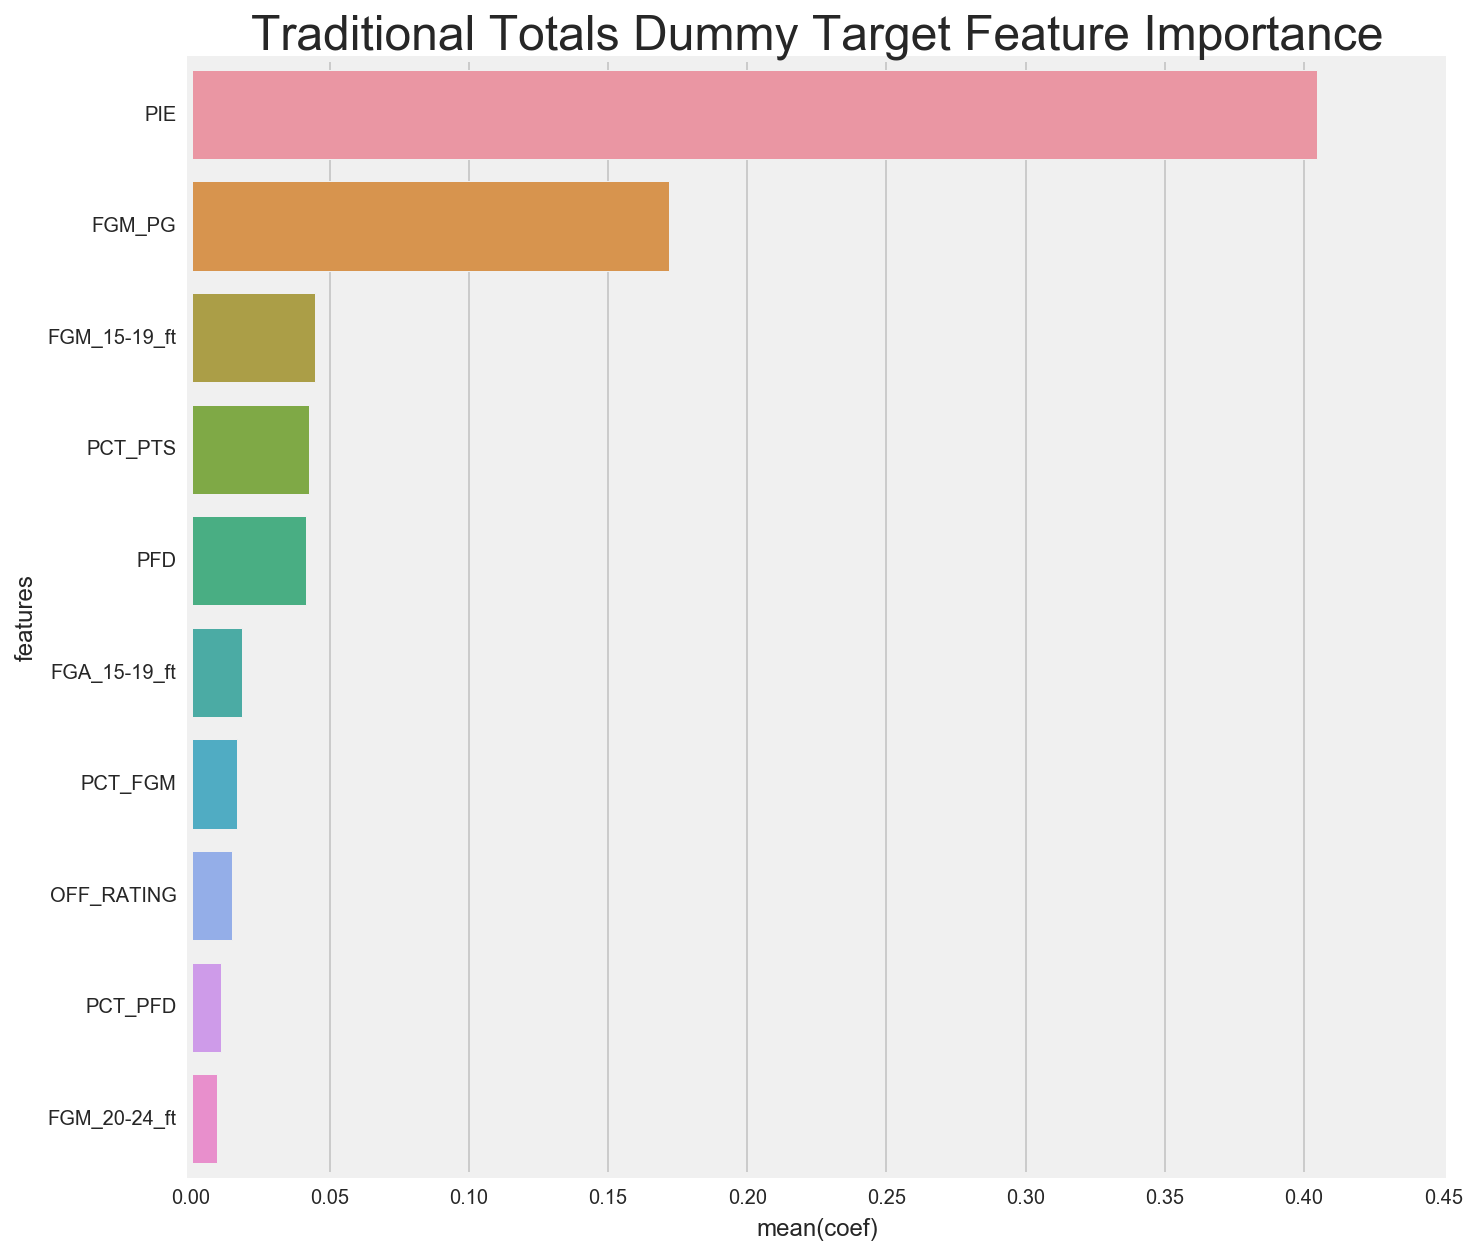

In [261]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

rf_agg_model_fi
ax = sns.barplot(y='features', x='coef', data=rf_agg_model_fi.sort_values('coef', ascending=False).head(10), orient='h')
ax.set_title('Traditional Totals Dummy Target Feature Importance', size=24)

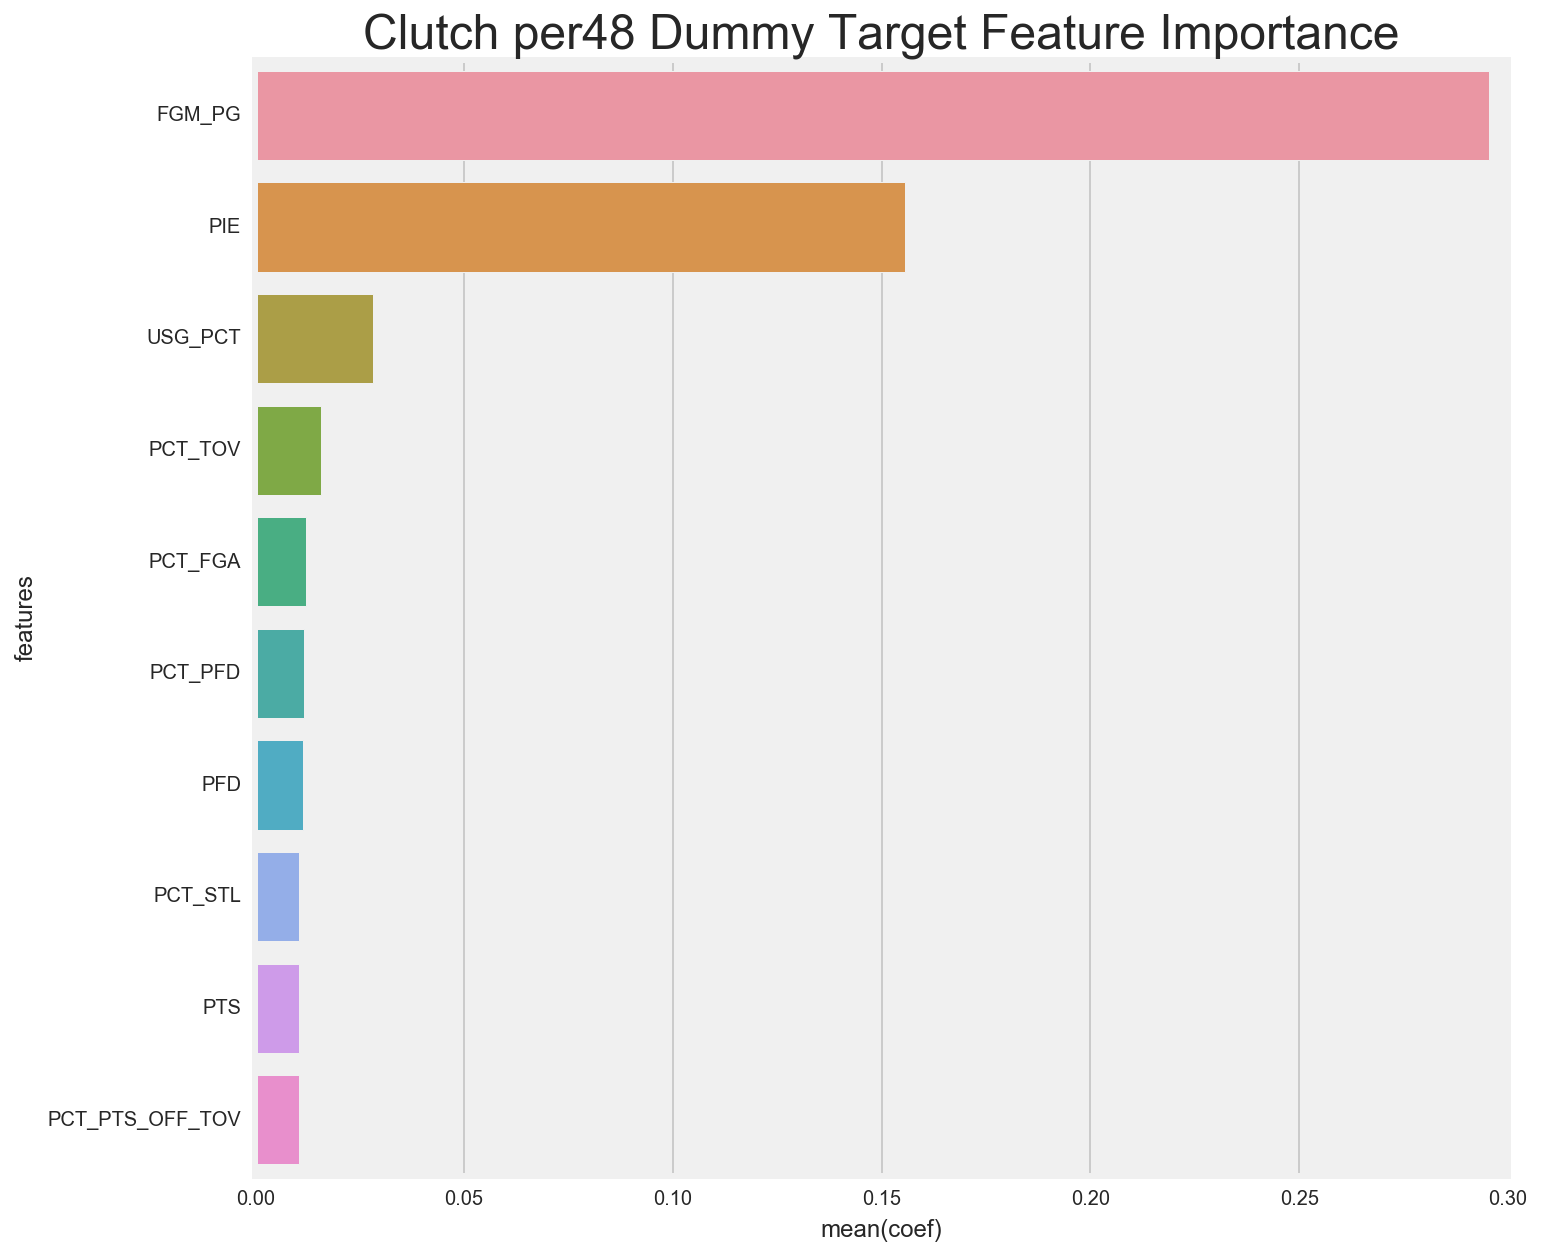

In [259]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=rf_clutch_model_fi.sort_values('coef', ascending=False).head(10), orient='h')
ax.set_title('Clutch per48 Dummy Target Feature Importance', size=24)

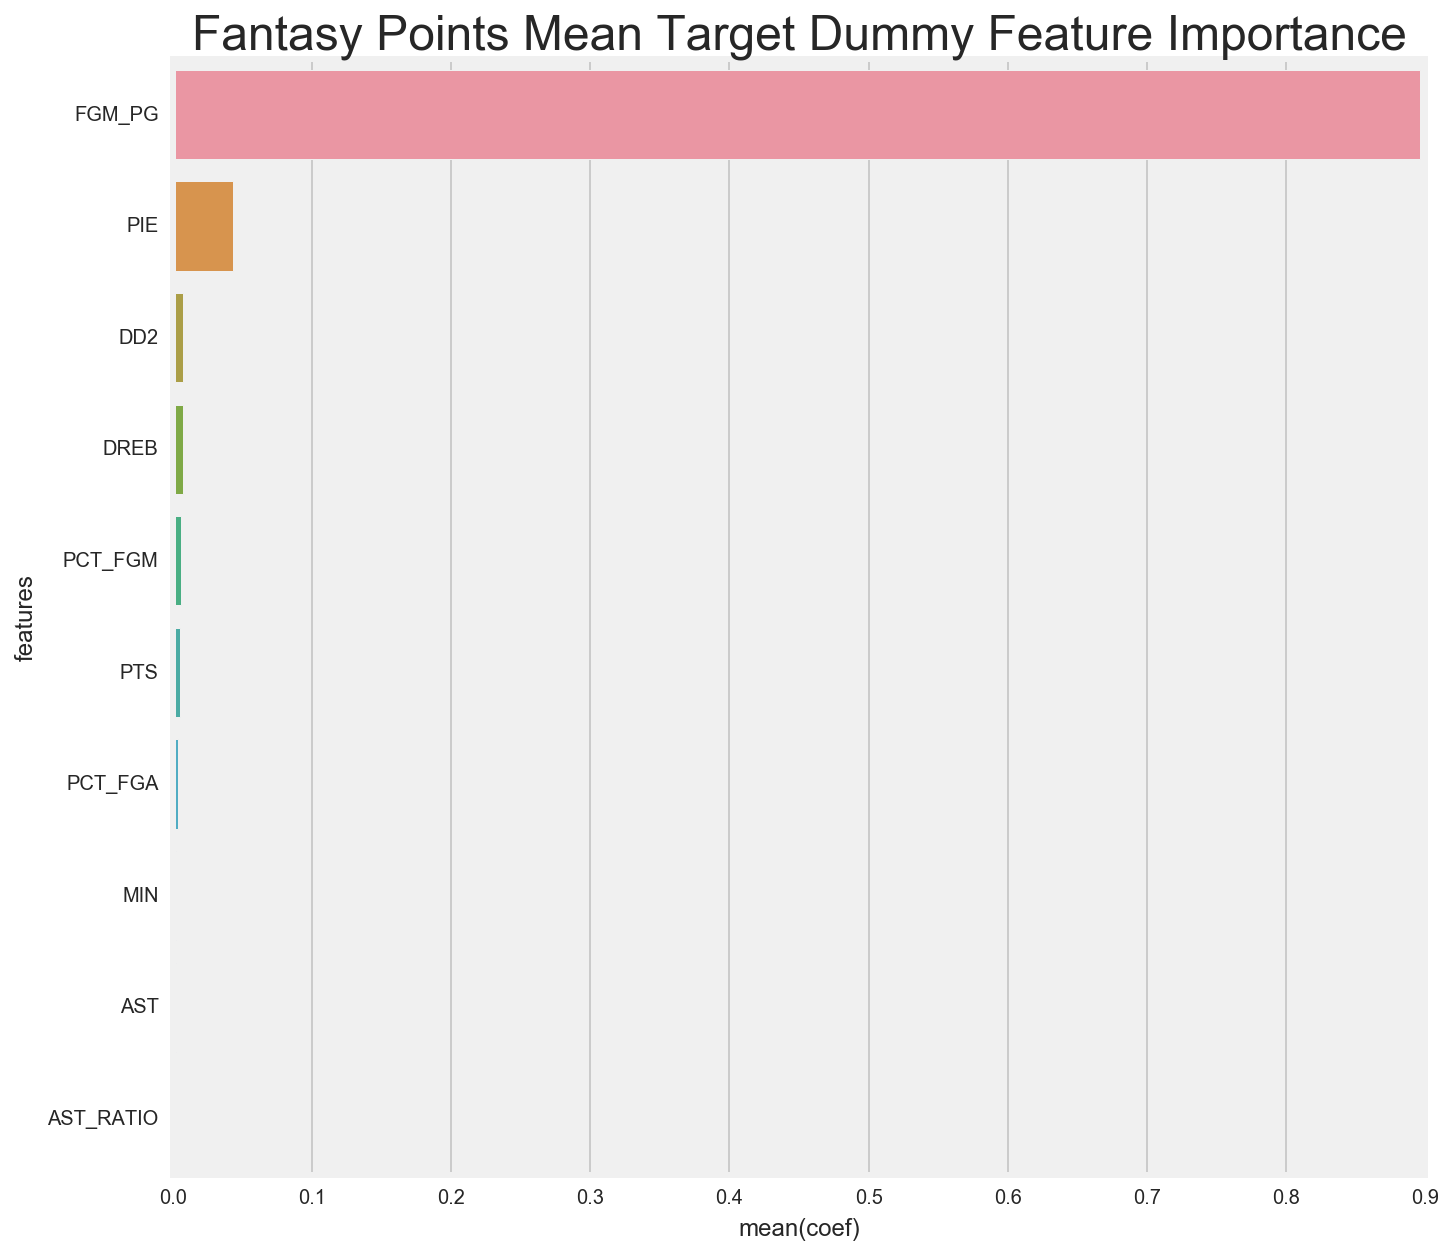

In [262]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

rf_agg_model_fi
sns.barplot(y='features', x='coef', data=rf_fp_mean_model_fi.sort_values('coef', ascending=False).head(10), orient='h')
ax.set_title('Fantasy Points Mean Target Dummy Feature Importance', size=24)

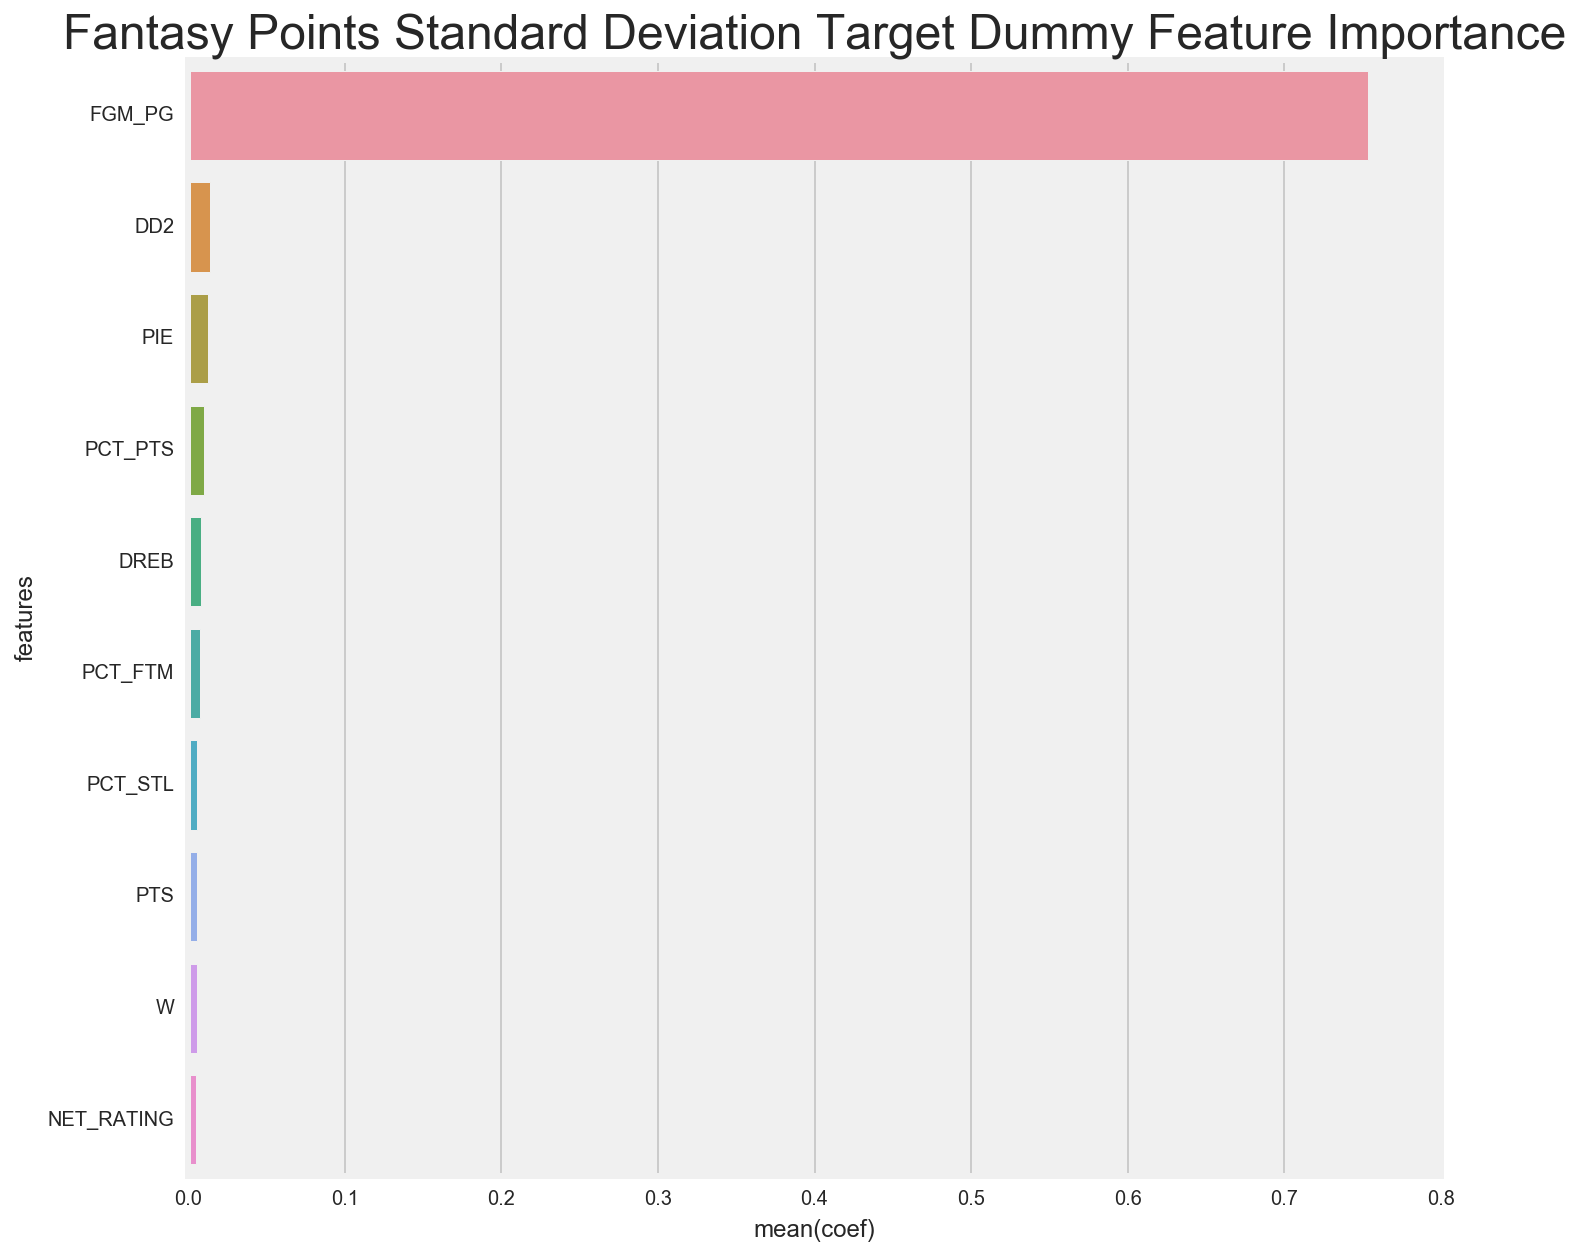

In [263]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

rf_agg_model_fi
sns.barplot(y='features', x='coef', data=rf_fp_std_model_fi.sort_values('coef', ascending=False).head(10), orient='h')
ax.set_title('Fantasy Points Standard Deviation Target Dummy Feature Importance', size=24)

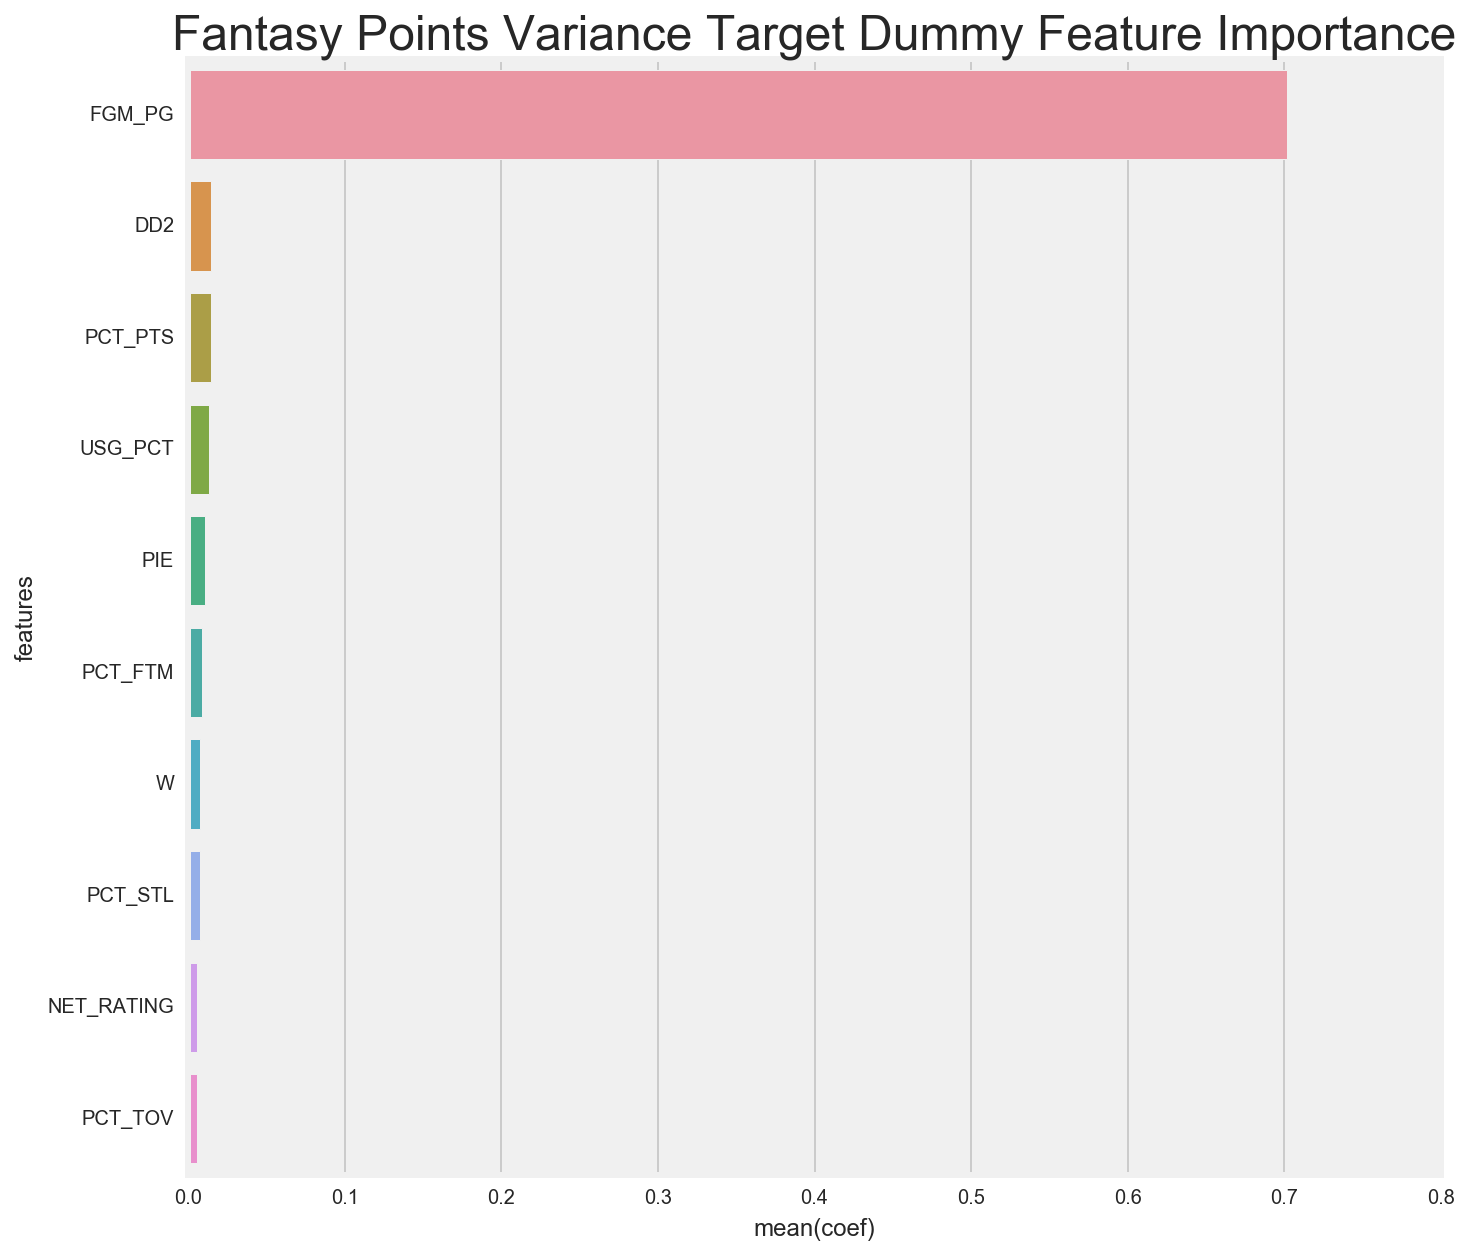

In [264]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

rf_agg_model_fi
sns.barplot(y='features', x='coef', data=rf_fp_var_model_fi.sort_values('coef', ascending=False).head(10), orient='h')
ax.set_title('Fantasy Points Variance Target Dummy Feature Importance', size=24)

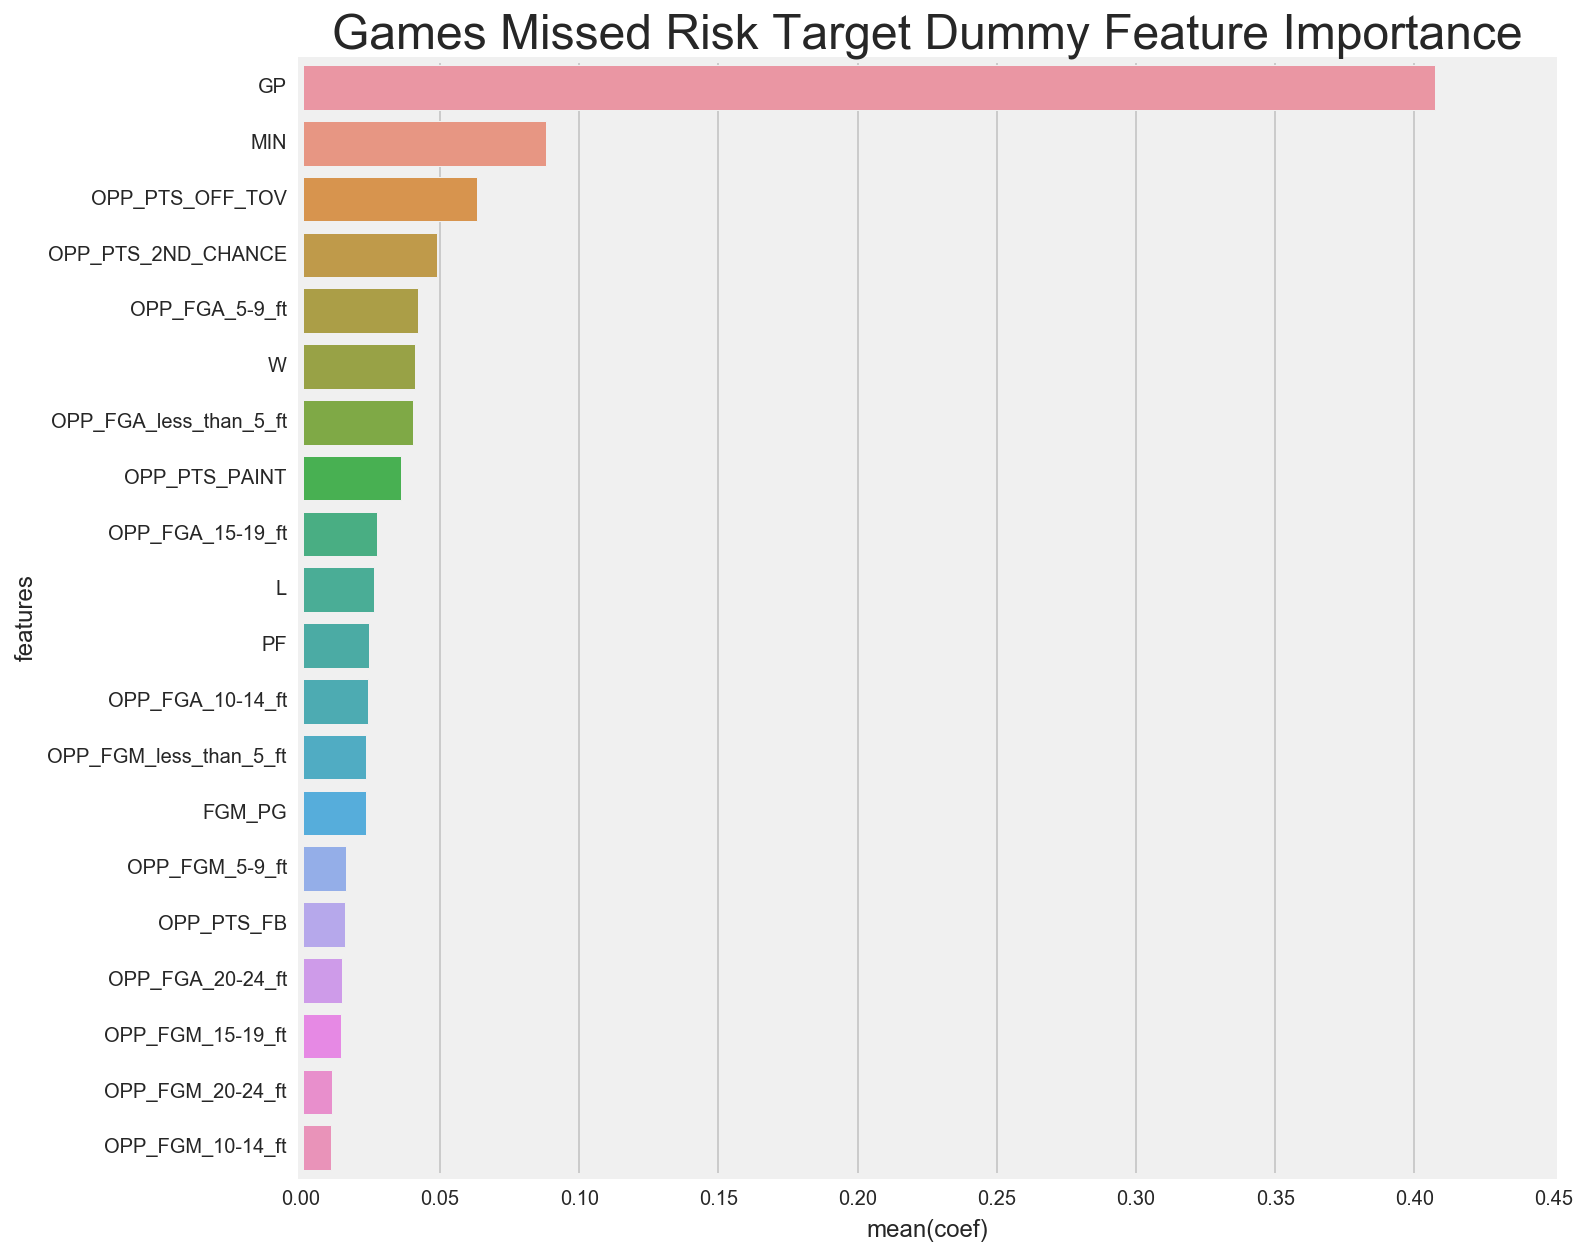

In [266]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

rf_agg_model_fi
sns.barplot(y='features', x='coef', data=rf_game_risk_model_fi.sort_values('coef', ascending=False).head(20), orient='h')
ax.set_title('Games Missed Risk Target Dummy Feature Importance', size=24)

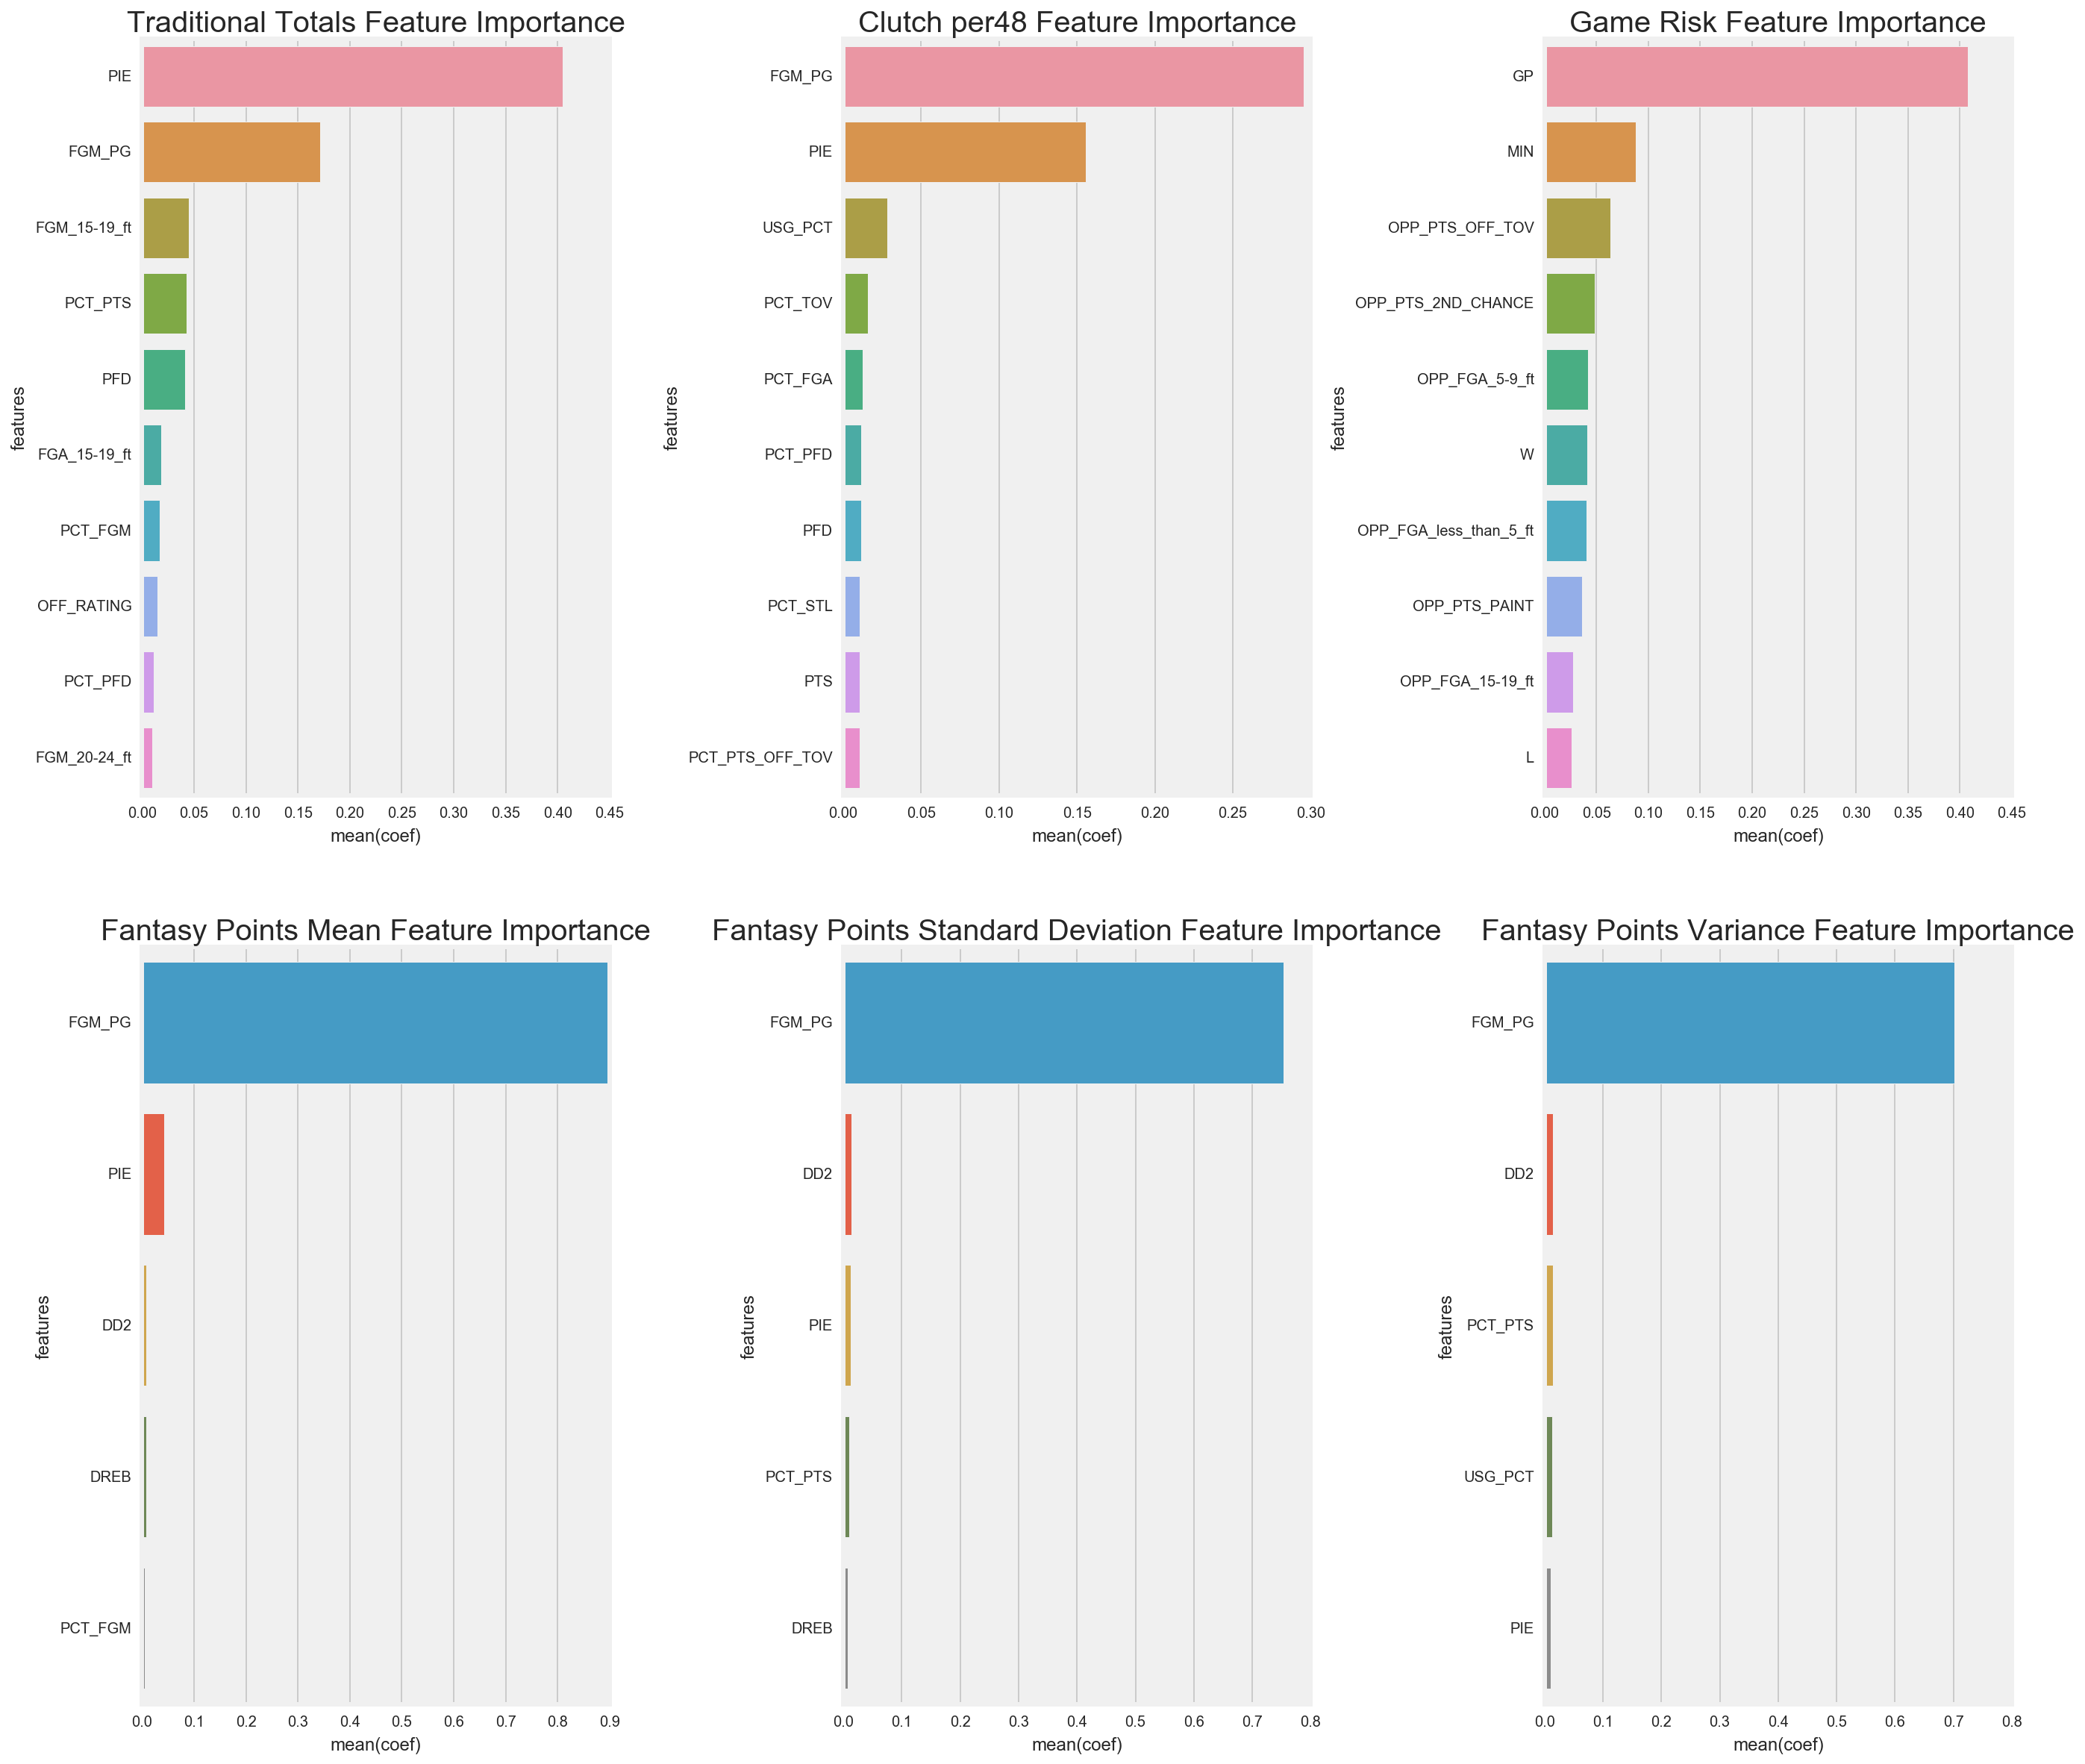

In [289]:
fig, ax = plt.subplots(figsize=(20,20), nrows=2, ncols=3)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
sns.barplot(y='features', x='coef', data=rf_agg_model_fi.sort_values('coef', ascending=False).head(10), orient='h', ax=ax[0,0])
sns.barplot(y='features', x='coef', data=rf_clutch_model_fi.sort_values('coef', ascending=False).head(10), orient='h', ax=ax[0,1])
sns.barplot(y='features', x='coef', data=rf_game_risk_model_fi.sort_values('coef', ascending=False).head(10), orient='h', ax=ax[0,2])
sns.barplot(y='features', x='coef', data=rf_fp_mean_model_fi.sort_values('coef', ascending=False).head(5), orient='h', ax=ax[1,0])
sns.barplot(y='features', x='coef', data=rf_fp_std_model_fi.sort_values('coef', ascending=False).head(5), orient='h', ax=ax[1,1])
sns.barplot(y='features', x='coef', data=rf_fp_var_model_fi.sort_values('coef', ascending=False).head(5), orient='h', ax=ax[1,2])

ax[0,0].set_title('Traditional Totals Feature Importance', size=20)
ax[0,1].set_title('Clutch per48 Feature Importance', size=20)
ax[0,2].set_title('Game Risk Feature Importance', size=20)
ax[1,0].set_title('Fantasy Points Mean Feature Importance', size=20)
ax[1,1].set_title('Fantasy Points Standard Deviation Feature Importance', size=20)
ax[1,2].set_title('Fantasy Points Variance Feature Importance', size=20)

In [85]:
y_game_risk_roc = label_binarize((testY_game_risk * -1), classes=[0,1,2,3])
n_classes = y_game_risk_roc.shape[1]

In [89]:
prediction_prob_rf_game_risk = rf_model_game_risk.predict_proba(testX_game_risk)

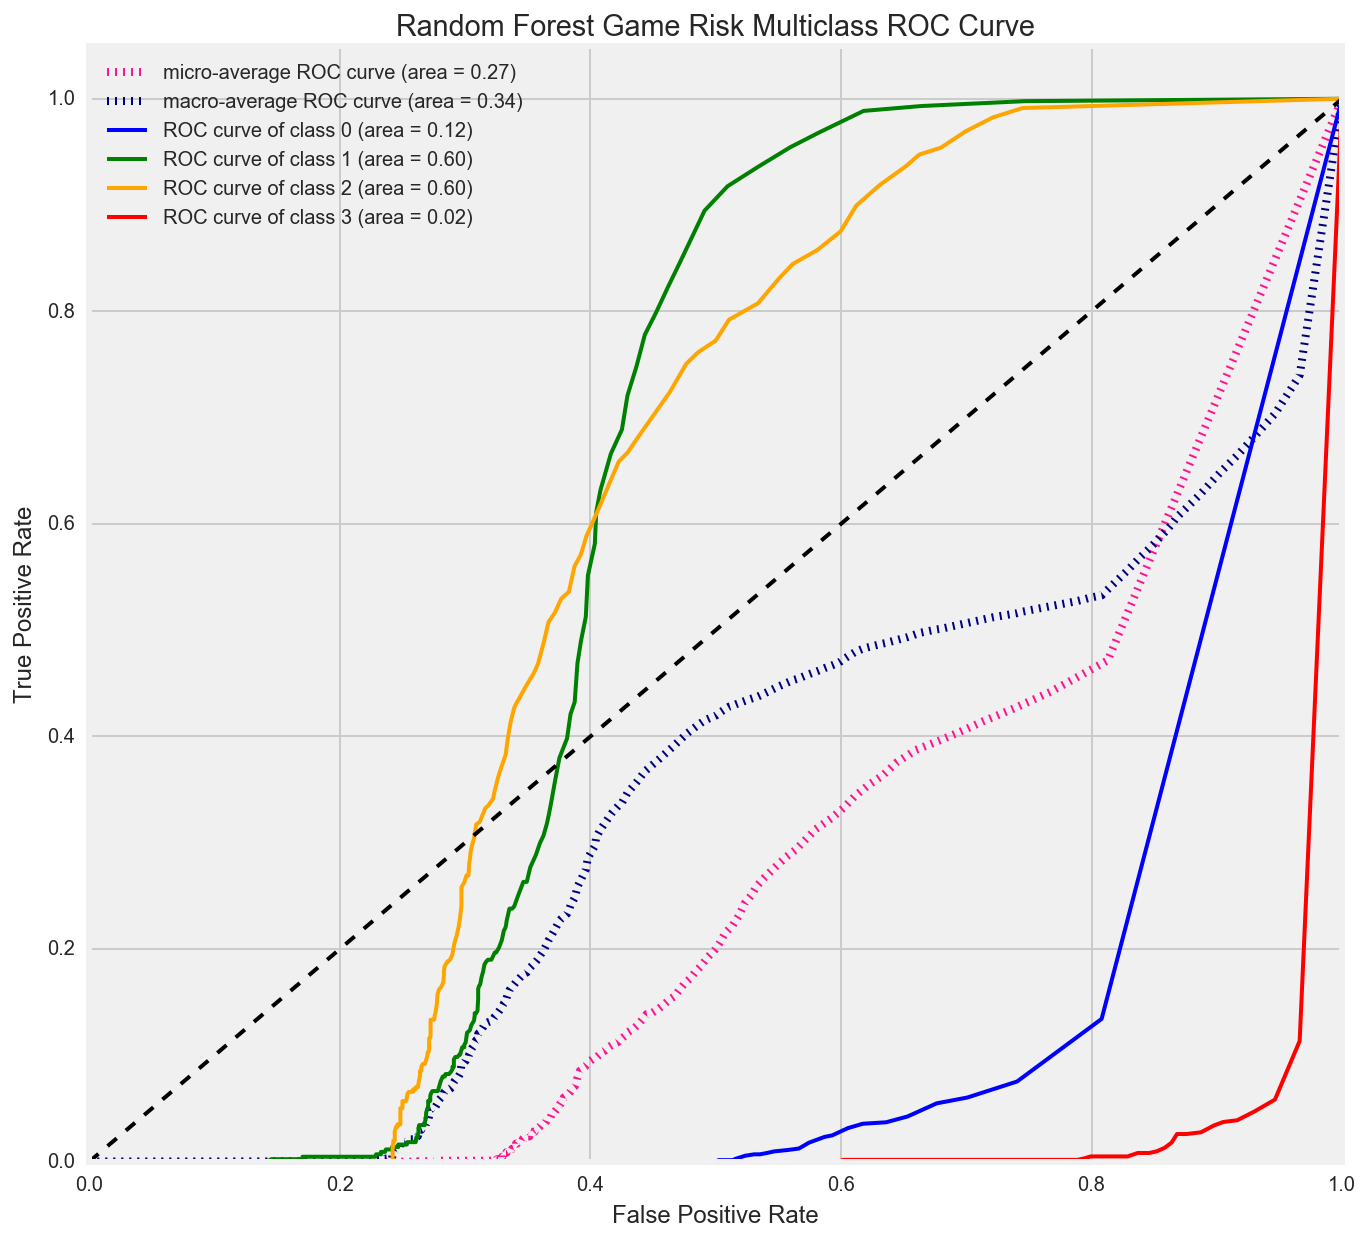

In [331]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_game_risk_roc[:, i], prediction_prob_rf_game_risk[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_game_risk_roc.ravel(), prediction_prob_rf_game_risk.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'green', 'orange', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Game Risk Multiclass ROC Curve')
plt.legend(loc="upper left")
plt.show()

In [168]:
pos_corr_risk_fs = ['inv_game_risk', 'GP', 'MIN']

#  'OPP_PTS_2ND_CHANCE', 'OPP_PTS_OFF_TOV', 'OPP_FGA_less_than_5_ft']
#                    'OPP_FGA_5-9_ft', 'W', 'OPP_PTS_PAINT', 'OPP_FGA_10-14_ft', 'OPP_FGA_15-19_ft', 'L','PF',
#                    'OPP_FGM_less_than_5_ft', 'OPP_FGM_5-9_ft', 'OPP_FGA_20-24_ft', 'L', 'OPP_PTS_FB', 'OPP_FGM_15-19_ft',
#                    'FGM_PG', 'OPP_FGM_10-14_ft', 'OPP_FGM_20-24_ft']

In [169]:
df_corr_game_risk_fs = df_model[pos_corr_risk_fs]
y_game_risk_fs = df_corr_game_risk_fs.inv_game_risk.values
X_game_risk_fs = df_corr_game_risk_fs.ix[:,1:]

In [171]:
trainX_game_risk_fs, testX_game_risk_fs, trainY_game_risk_fs, testY_game_risk_fs = train_test_split(X_game_risk_fs, y_game_risk_fs, train_size=0.85, stratify=y_game_risk_fs)
print 'Game Risk\n'
print trainX_game_risk_fs.shape, trainY_game_risk_fs.shape
print testX_game_risk_fs.shape, testY_game_risk_fs.shape

Game Risk

(7617, 2) (7617,)
(1345, 2) (1345,)


In [172]:
forest = RandomForestClassifier()

params = {'max_depth':[2,3,4,5,6,None], 
          'max_features':['auto'],
          'min_samples_split':[2,4,8,16,32,64,128,256],
          'n_estimators':[500],
          'criterion': ['gini']
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=4,  cv=5, verbose=1) 

rf_model_game_risk_fs = estimator_rfr.fit(trainX_game_risk_fs, trainY_game_risk_fs)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   35.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  4.3min finished


In [162]:
predict_rf_game_risk_train_fs = rf_model_game_risk_fs.predict(trainX_game_risk_fs)
predict_rf_game_risk_test_fs = rf_model_game_risk_fs.predict(testX_game_risk_fs)

In [163]:
print 'Game Risk R^2 train: ', r2_score(trainY_game_risk_fs, predict_rf_game_risk_train_fs)
print 'Game Risk R^2 test: ', r2_score(testY_game_risk_fs, predict_rf_game_risk_test_fs)

Game Risk R^2 train:  0.924484960733
Game Risk R^2 test:  0.900871784342


In [164]:
rf_game_risk_model_fs = pd.DataFrame({'features':trainX_game_risk_fs.columns,'coef':rf_model_game_risk_fs.best_estimator_.feature_importances_})

In [165]:
rf_game_risk_model_fs

,coef,features
0,0.671137,GP
1,0.187087,MIN
2,0.089109,OPP_PTS_OFF_TOV
3,0.052667,OPP_FGA_less_than_5_ft


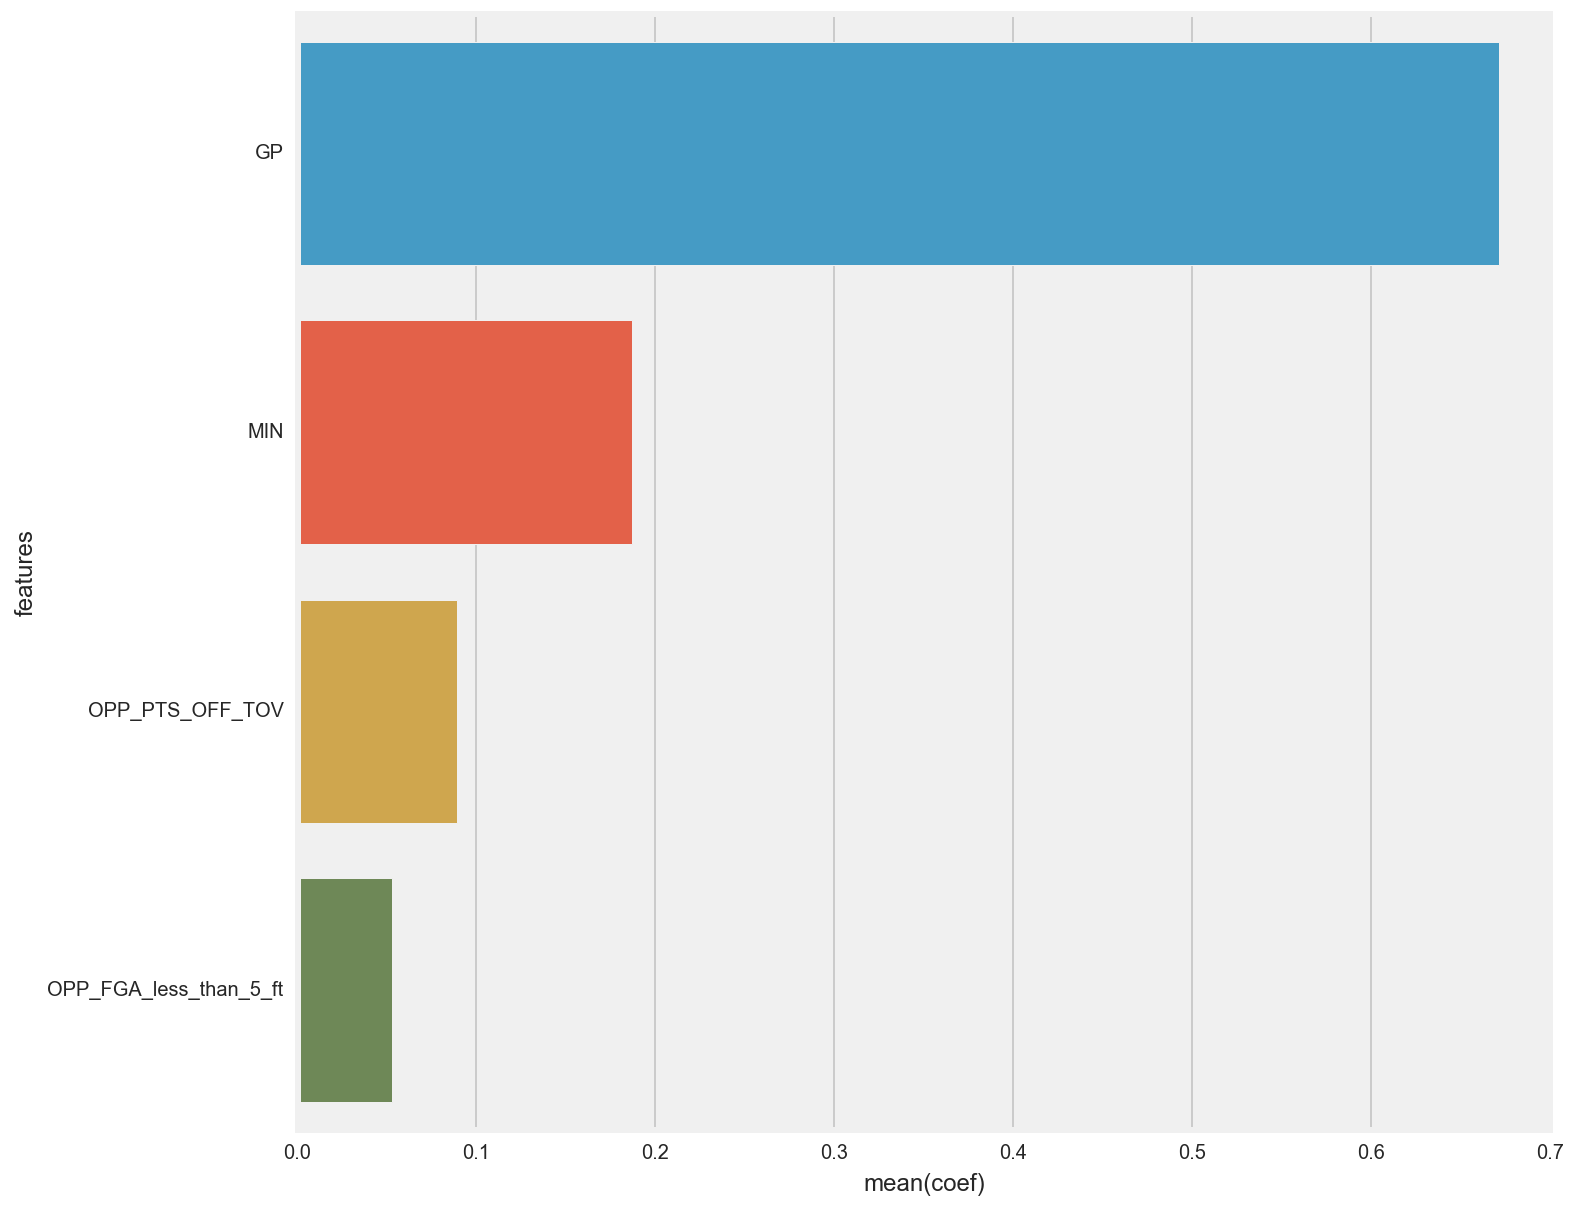

In [166]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

sns.barplot(y='features', x='coef', data=rf_game_risk_model_fs.sort_values('coef', ascending=False).head(20), orient='h')

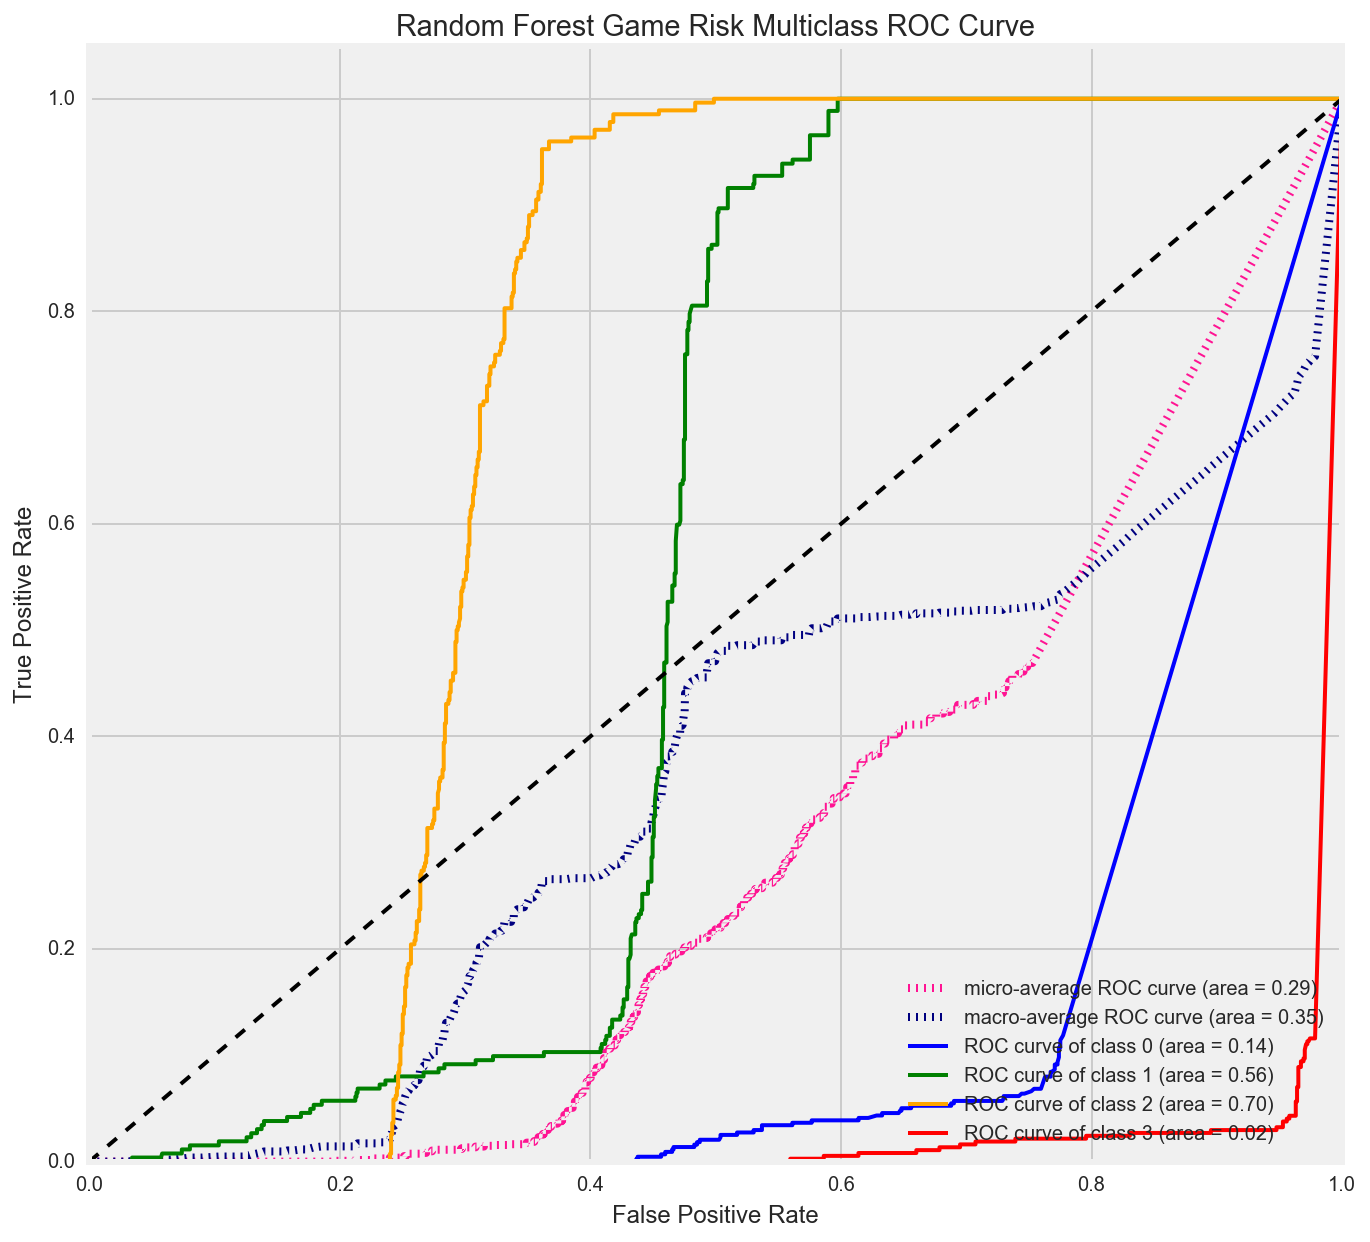

             precision    recall  f1-score   support

    lowrisk       1.00      0.97      0.99       730
    caution       0.98      0.98      0.98       437
  high_risk       0.95      0.96      0.96       457
     danger       0.98      1.00      0.99       617

avg / total       0.98      0.98      0.98      2241



In [247]:
y_game_risk_roc_fs = label_binarize((testY_game_risk_fs * -1), classes=[0,1,2,3])
n_classes = y_game_risk_roc_fs.shape[1]

prediction_prob_rf_game_risk_fs = rf_model_game_risk_fs.predict_proba(testX_game_risk_fs)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_game_risk_roc_fs[:, i], prediction_prob_rf_game_risk_fs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_game_risk_roc_fs.ravel(), prediction_prob_rf_game_risk_fs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'green', 'orange', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Game Risk Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()
print classification_report(testY_game_risk * -1, predict_rf_game_risk_test * -1, target_names=["lowrisk", 'caution', 'high_risk', 'danger'])

[ 0.    0.11  0.13  0.13  0.14  0.15  0.15  0.16  0.17  0.17  0.17  0.17
  0.18  0.18  0.18  0.18  0.19  0.19  0.19  0.19  0.2   0.2   0.2   0.2
  0.2   0.21  0.21  0.21  0.21  0.22  0.22  0.22  0.22  0.22  0.22  0.22
  0.22  0.23  0.23  0.23  0.23  0.23  0.23  0.24  0.24  0.24  0.24  0.24
  0.24  0.24  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.26  0.26
  0.26  0.26  0.26  0.26  0.26  0.26  0.26  0.27  0.27  0.27  0.27  0.27
  0.28  0.28  0.28  0.29  0.29  0.29  0.29  0.29  0.3   0.3   0.3   0.3
  0.3   0.3   0.3   0.3   0.31  0.31  0.31  0.31  0.31  0.31  0.31  0.31
  0.32  0.32  0.32  0.32  0.32  0.33  0.33  0.33  0.33  0.33  0.33  0.34
  0.34  0.34  0.35  0.35  0.35  0.36  0.36  0.37  0.37  0.38  0.39  0.39
  0.4   0.41  0.42  0.43  0.44  0.45  0.47  0.49  0.52  0.59  1.  ] [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  

KeyError: 1

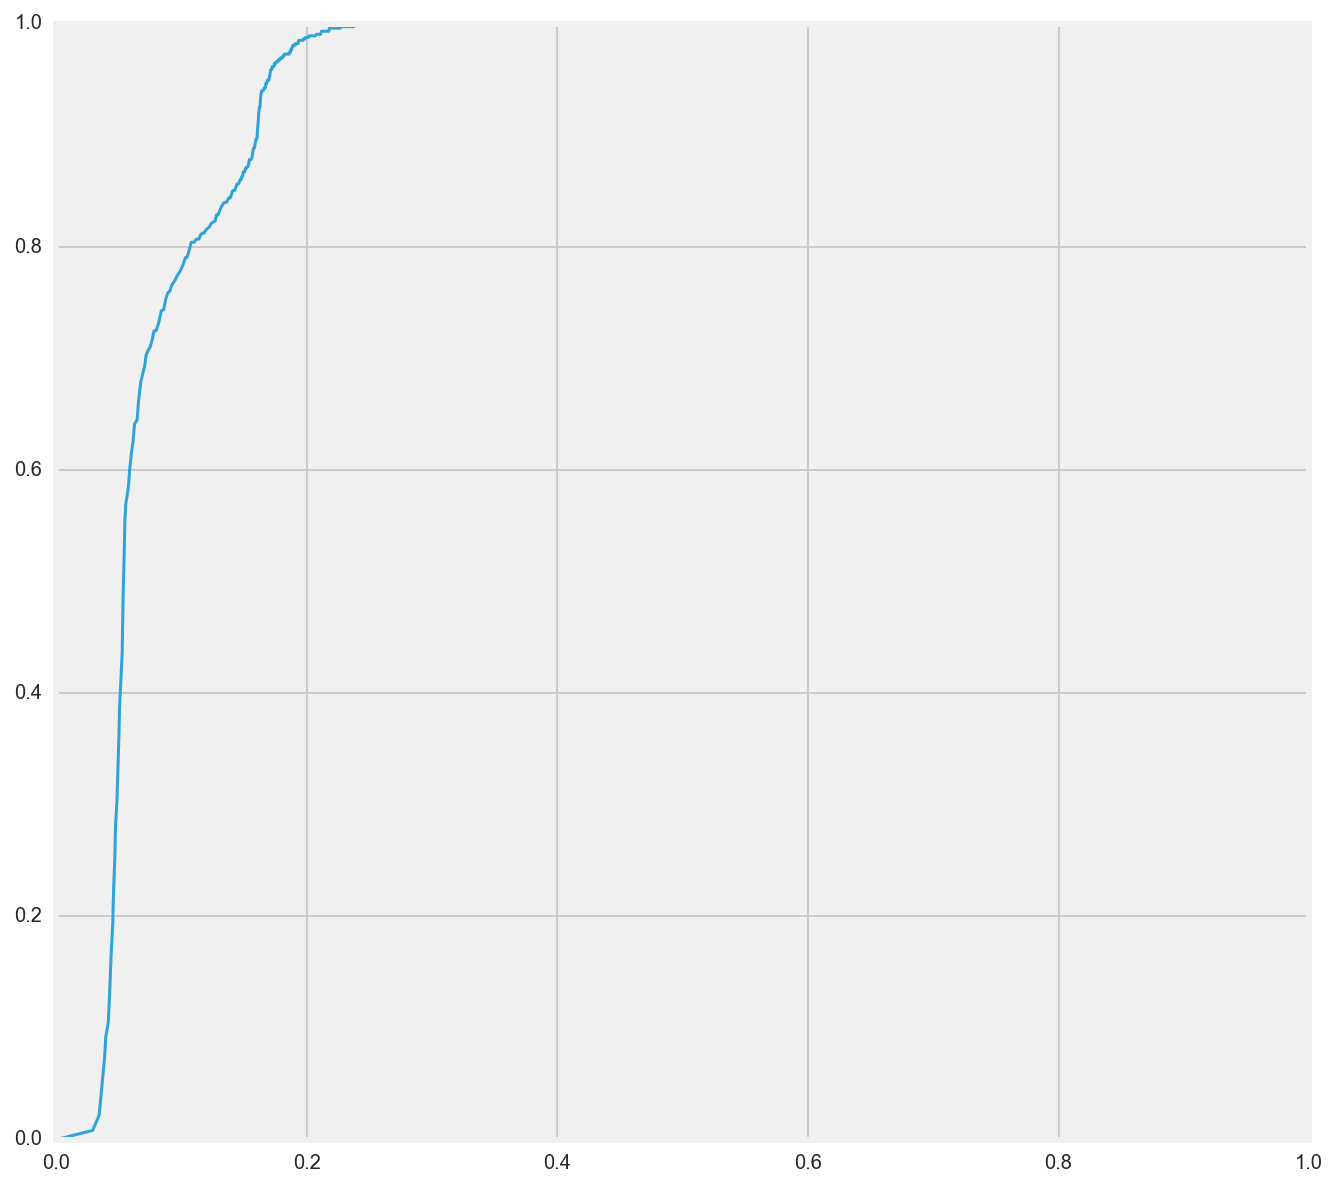

In [334]:
class multi_roc:
    
    # model / estimator
    estimator = False
    line_width = 1.5
    
    
    def __init__(self, estimator):
        self.estimator = estimator
        
        if "classes_" not in vars(estimator):
            raise Exception("EstimatorError", "Estimator has no fit data.  Run .fit()")
                            
    def plot(self, X_test, y_test, verbose=False, filter_class=False, figsize=(10,10)):
        _ = ""
        
        # Get predictions if classification report
        if verbose:
            predicted = self.estimator.predict_proba(X_test)    
        
        y_score = self.estimator.predict_proba(X_test)
        y = label_binarize(y_test, classes=self.estimator.classes_)
        
        n_classes = y.shape[1]
        
        fpr = dict()
        tpr = dict()
        
        roc_auc = dict()
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
            roc_auc[self.estimator.classes_[i]] = auc(fpr[i], tpr[i])
        for i in range(n_classes):
            print fpr[i], tpr[i]
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        if filter_class:
            # Plot of a ROC curve for a specific class
            figure = plt.figure()
            figure.set_size_inches(figsize[0], figsize[1])
            plt.plot(fpr[1], tpr[1], label='ROC curve (area = {1:0.2f})' % roc_auc[1], figsize=(10,10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver operating characteristic example')
            plt.legend(loc="lower right")
            plt.show()
            
            return
        
        # Plot ROC curve
        
        plt.figure(figsize=figsize)
         
        plt.plot(fpr["micro"], tpr["micro"],
                 label='Micro-Average (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=self.line_width)
        
#         for i in range(n_classes):
#             plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'
#                                            ''.format(i, roc_auc[i]), linewidth=self.line_width)
        
        colors = cycle(['blue', 'green', 'orange', 'red'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))
        
        # 50 / 50 line
        myplot = plt.plot([0, 1], [0, 1], 'k--', linewidth=self.line_width)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Specificity (FPR)', fontsize=18)
        plt.ylabel('Sensitivity (TPR)', fontsize=18)
        plt.title('Receiver Operating Characteristic\n(multi-class)', fontsize=18)
        plt.legend(loc="lower right")
        
        #plt.text(24,13.4,'Table Title',size=8)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="none", ec="b", lw=0)
        t = plt.text(.54, .51, "50%", ha="center", va="center", rotation=45,
                   size=15,
                   bbox=bbox_props)
        
        bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="b", lw=0)
        t = plt.text(1.35, .10, report, ha="center", va="center",
                   size=12,
                   bbox=bbox_props)
        
        plt.show()

roc = multi_roc(estimator = rf_model_game_risk.best_estimator_)
roc.plot(testX_game_risk, (testY_game_risk * -1), verbose=True, figsize=(10,10))

In [196]:
cnf_matrix = confusion_matrix(testY_game_risk, predict_rf_game_risk_test)

In [230]:
class_names = (df_corr_game_risk.inv_game_risk.unique() * -1)

Confusion matrix, without normalization
[[617   0   0   0]
 [ 10 440   7   0]
 [  1   7 429   0]
 [  0  16   3 711]]


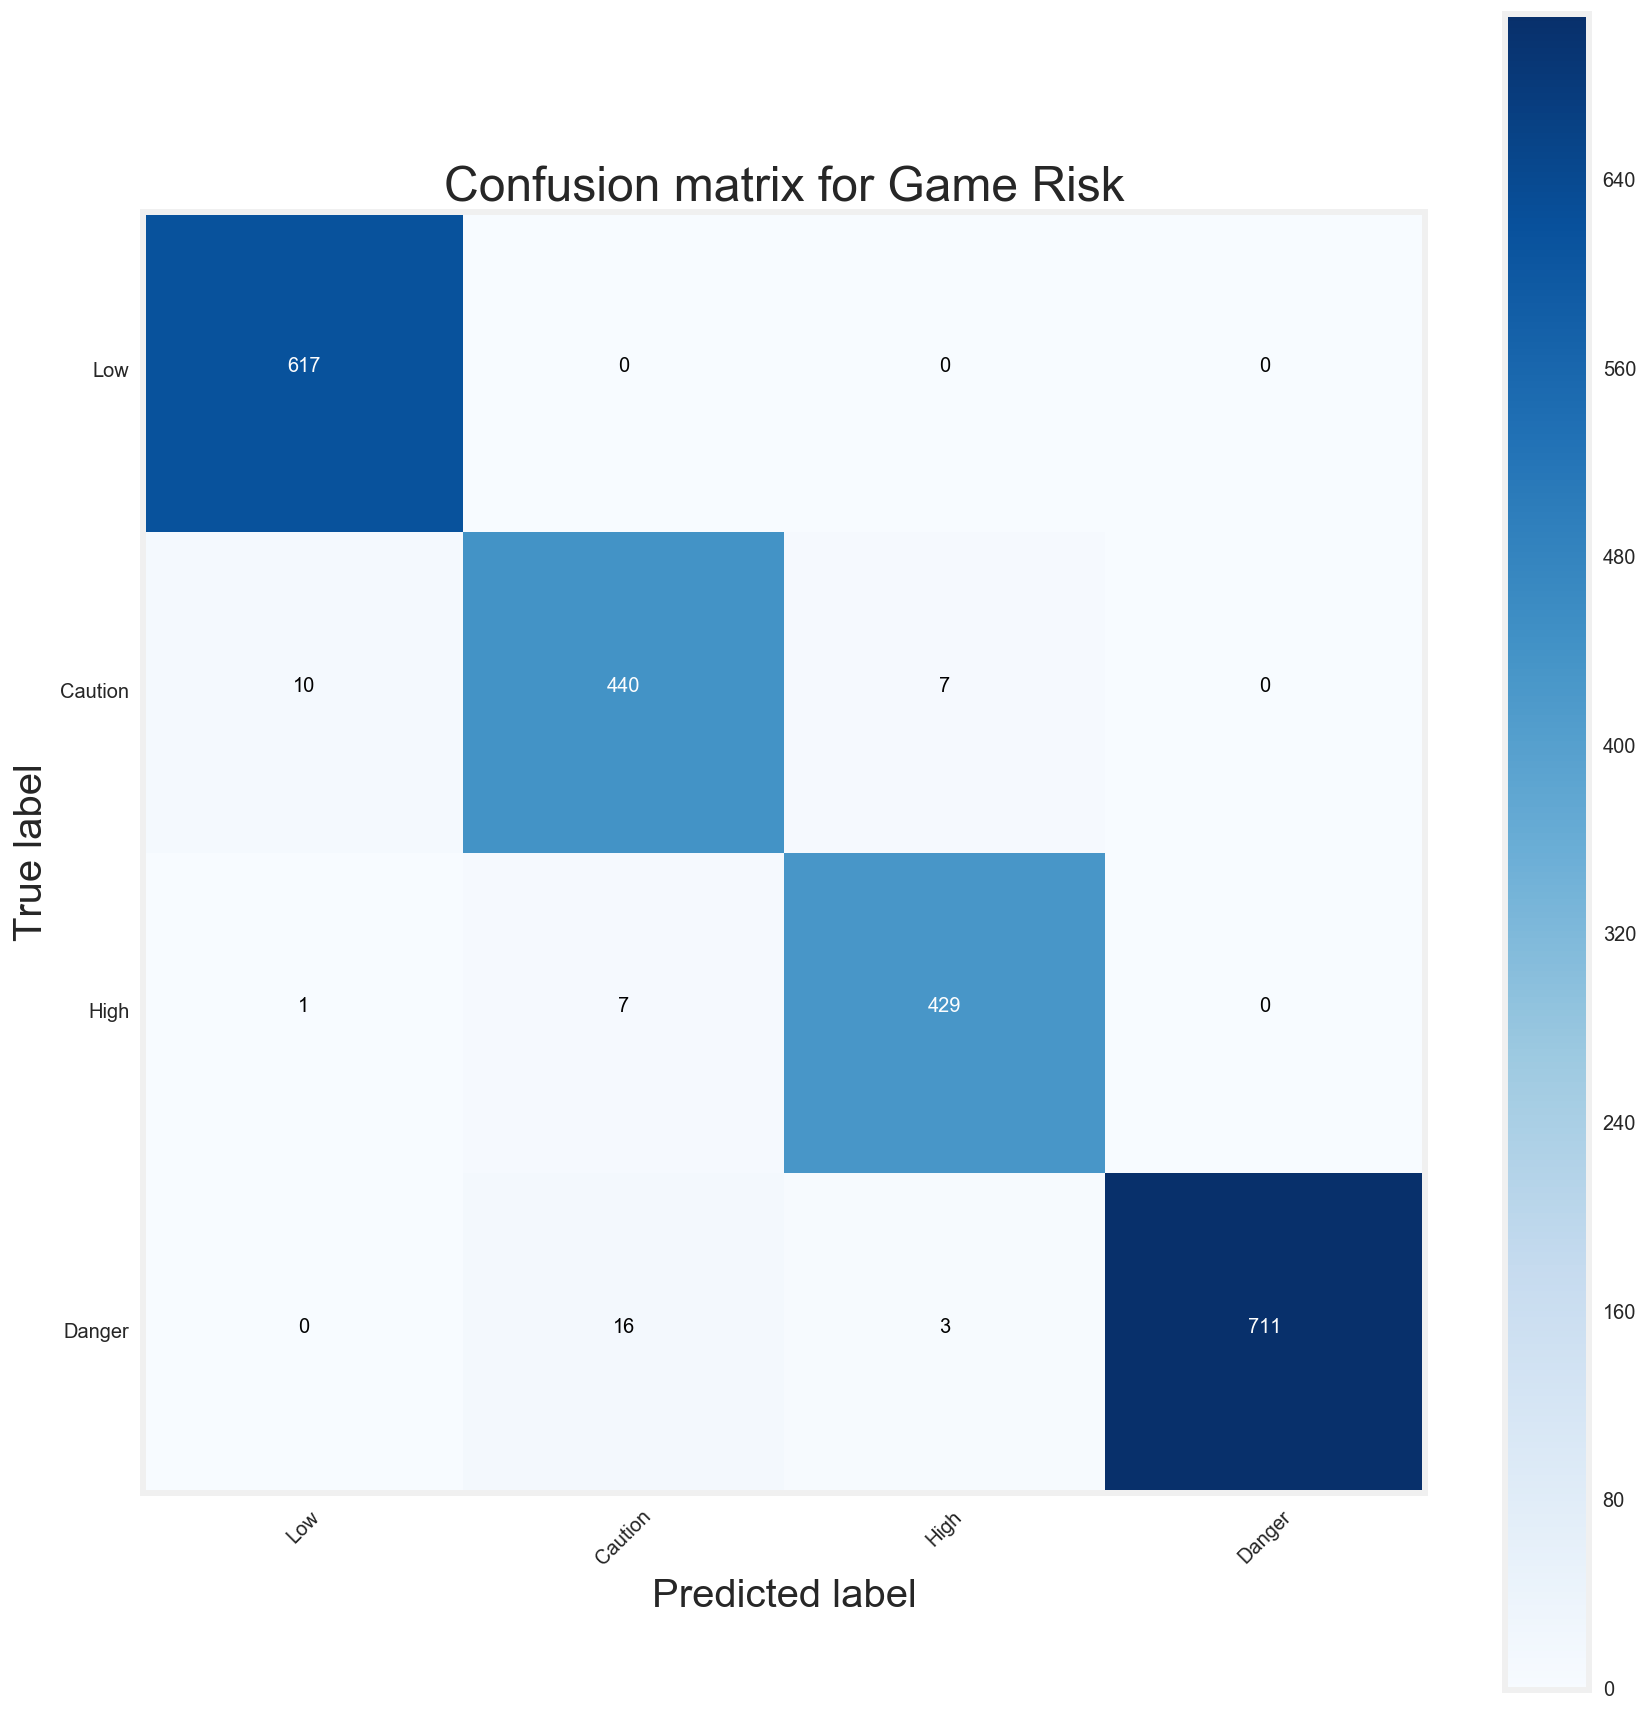

In [316]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca()
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=24)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
#     plt.tick_params(
#     axis='both', 
#     which='major',
#     bottom='off',
#     top='off')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.grid(b=False)
    ax.set_xticklabels(['Low', 'Caution', 'High', 'Danger'])
    ax.set_yticklabels(['Low', 'Caution', 'High', 'Danger'])
    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

cnf_matrix = confusion_matrix(testY_game_risk, predict_rf_game_risk_test)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for Game Risk')

plt.show()